#  Creating a corona dataset from start

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox

pd.options.display.max_columns = None

In [2]:
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

Some settings for plots

## Feature Sources:

1) https://ourworldindata.org/coronavirus-source-data

2) https://data.worldbank.org/

## Import Data

In [3]:
df_corona_cases = pd.read_excel("corona_cases_22-4-20.xlsx")
df_worldbank    = pd.read_excel("worldbank_data_with_air_pollution.xlsx")

In [4]:
df_corona_cases


iso_code  location        date  total_cases  new_cases  total_deaths  \
0          ABW     Aruba  2020-03-13            2          2             0   
1          ABW     Aruba  2020-03-20            4          2             0   
2          ABW     Aruba  2020-03-24           12          8             0   
3          ABW     Aruba  2020-03-25           17          5             0   
4          ABW     Aruba  2020-03-26           19          2             0   
...        ...       ...         ...          ...        ...           ...   
12241      ZWE  Zimbabwe  2020-04-17           24          1             3   
12242      ZWE  Zimbabwe  2020-04-18           24          0             3   
12243      ZWE  Zimbabwe  2020-04-19           25          1             3   
12244      ZWE  Zimbabwe  2020-04-20           25          0             3   
12245      ZWE  Zimbabwe  2020-04-21           25          0             3   

       new_deaths  total_cases_per_million  new_cases_per_million  \
0               0                   18.733                 18.733   
1               0                   37.465                 18.733   
2               0                  112.395                 74.930   
3               0                  159.227                 46.831   
4               0                  177.959                 18.733   
...           ...                      ...                    ...   
12241           0                    1.615                  0.067   
12242           0                    1.615                  0.000   
12243           0                    1.682                  0.067   
12244           0                    1.682                  0.000   
12245           0                    1.682                  0.000   

       total_deaths_per_million  new_deaths_per_million  total_tests  \
0                         0.000                   0.000          nan   
1                         0.000                   0.000          nan   
2                         0.000                   0.000          nan   
3                         0.000                   0.000          nan   
4                         0.000                   0.000          nan   
...                         ...                     ...          ...   
12241                     0.202                   0.000          nan   
12242                     0.202                   0.000          nan   
12243                     0.202                   0.000          nan   
12244                     0.202                   0.000          nan   
12245                     0.202                   0.000          nan   

       new_tests  total_tests_per_thousand  new_tests_per_thousand tests_units  
0            nan                       nan                     nan         NaN  
1            nan                       nan                     nan         NaN  
2            nan                       nan                     nan         NaN  
3            nan                       nan                     nan         NaN  
4            nan                       nan                     nan         NaN  
...          ...                       ...                     ...         ...  
12241        nan                       nan                     nan         NaN  
12242        nan                       nan                     nan         NaN  
12243        nan                       nan                     nan         NaN  
12244        nan                       nan                     nan         NaN  
12245        nan                       nan                     nan         NaN  

[12246 rows x 16 columns]

In [5]:
df_worldbank

Unnamed: 0  Unnamed: 0.1  Year           Country Name Country Code  \
0             0             0  2018            Afghanistan          AFG   
1             1             1  2018                Albania          ALB   
2             2             2  2018                Algeria          DZA   
3             3             3  2018         American Samoa          ASM   
4             4             4  2018                Andorra          AND   
..          ...           ...   ...                    ...          ...   
212         212           212  2018  Virgin Islands (U.S.)          VIR   
213         213           213  2018     West Bank and Gaza          PSE   
214         214           214  2018            Yemen, Rep.          YEM   
215         215           215  2018                 Zambia          ZMB   
216         216           216  2018               Zimbabwe          ZWE   

     Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
0                                               50.500                       
1                                               99.800                       
2                                               96.600                       
3                                                  nan                       
4                                                  nan                       
..                                                 ...                       
212                                                nan                       
213                                             99.600                       
214                                             44.700                       
215                                             63.300                       
216                                             78.100                       

     Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]  \
0                                               57.249                         
1                                              271.543                         
2                                              260.413                         
3                                                  nan                         
4                                             3834.731                         
..                                                 ...                         
212                                                nan                         
213                                                nan                         
214                                             72.039                         
215                                             56.544                         
216                                             93.942                         

     Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]  \
0                                              162.781                                          
1                                              759.667                                          
2                                              998.154                                          
3                                                  nan                                          
4                                             4978.707                                          
..                                                 ...                                          
212                                                nan                                          
213                                                nan                                          
214                                            144.518                                          
215                                            175.178                                          
216                                            185.048                                          

     Diabetes prevalence (% of population

## Merging Datasets

In [6]:
del df_worldbank["Unnamed: 0"]
del df_worldbank["Unnamed: 0.1"]
del df_worldbank["Year"]
df_worldbank.rename(columns={"Country Code":"iso_code"},inplace=True)
df_worldbank

Country Name iso_code  \
0              Afghanistan      AFG   
1                  Albania      ALB   
2                  Algeria      DZA   
3           American Samoa      ASM   
4                  Andorra      AND   
..                     ...      ...   
212  Virgin Islands (U.S.)      VIR   
213     West Bank and Gaza      PSE   
214            Yemen, Rep.      YEM   
215                 Zambia      ZMB   
216               Zimbabwe      ZWE   

     Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
0                                               50.500                       
1                                               99.800                       
2                                               96.600                       
3                                                  nan                       
4                                                  nan                       
..                                                 ...                       
212                                                nan                       
213                                             99.600                       
214                                             44.700                       
215                                             63.300                       
216                                             78.100                       

     Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]  \
0                                               57.249                         
1                                              271.543                         
2                                              260.413                         
3                                                  nan                         
4                                             3834.731                         
..                                                 ...                         
212                                                nan                         
213                                                nan                         
214                                             72.039                         
215                                             56.544                         
216                                             93.942                         

     Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]  \
0                                              162.781                                          
1                                              759.667                                          
2                                              998.154                                          
3                                                  nan                                          
4                                             4978.707                                          
..                                                 ...                                          
212                                                nan                                          
213                                                nan                                          
214                                            144.518                                          
215                                            175.178                                          
216                                            185.048                                          

     Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS]  \
0                                                8.600                      
1                                                4.500                      
2                                                8.500                      
3                                                  nan                      
4                                                6.600                      
..                  

In [7]:
df_merged = pd.merge(df_corona_cases,df_worldbank)
df_merged

iso_code  location        date  total_cases  new_cases  total_deaths  \
0          ABW     Aruba  2020-03-13            2          2             0   
1          ABW     Aruba  2020-03-20            4          2             0   
2          ABW     Aruba  2020-03-24           12          8             0   
3          ABW     Aruba  2020-03-25           17          5             0   
4          ABW     Aruba  2020-03-26           19          2             0   
...        ...       ...         ...          ...        ...           ...   
11893      ZWE  Zimbabwe  2020-04-17           24          1             3   
11894      ZWE  Zimbabwe  2020-04-18           24          0             3   
11895      ZWE  Zimbabwe  2020-04-19           25          1             3   
11896      ZWE  Zimbabwe  2020-04-20           25          0             3   
11897      ZWE  Zimbabwe  2020-04-21           25          0             3   

       new_deaths  total_cases_per_million  new_cases_per_million  \
0               0                   18.733                 18.733   
1               0                   37.465                 18.733   
2               0                  112.395                 74.930   
3               0                  159.227                 46.831   
4               0                  177.959                 18.733   
...           ...                      ...                    ...   
11893           0                    1.615                  0.067   
11894           0                    1.615                  0.000   
11895           0                    1.682                  0.067   
11896           0                    1.682                  0.000   
11897           0                    1.682                  0.000   

       total_deaths_per_million  new_deaths_per_million  total_tests  \
0                         0.000                   0.000          nan   
1                         0.000                   0.000          nan   
2                         0.000                   0.000          nan   
3                         0.000                   0.000          nan   
4                         0.000                   0.000          nan   
...                         ...                     ...          ...   
11893                     0.202                   0.000          nan   
11894                     0.202                   0.000          nan   
11895                     0.202                   0.000          nan   
11896                     0.202                   0.000          nan   
11897                     0.202                   0.000          nan   

       new_tests  total_tests_per_thousand  new_tests_per_thousand  \
0            nan                       nan                     nan   
1            nan                       nan                     nan   
2            nan                       nan                     nan   
3            nan                       nan                     nan   
4            nan                       nan                     nan   
...          ...                       ...                     ...   
11893        nan                       nan                     nan   
11894        nan                       nan                     nan   
11895        nan                       nan                     nan   
11896        nan                       nan                     nan   
11897        nan                       nan                     nan   

      tests_units Country Name  \
0             NaN        Aruba   
1             NaN        Aruba   
2             NaN        Aruba   
3             NaN        Aruba   
4             NaN        Aruba   
...           ...          ...   
11893         NaN     Zimbabwe   
11894         NaN     Zimbabwe   
11895         NaN     Zimbabwe   
11896         NaN     Zimbabwe   
11897         NaN     Zimbabwe   

       Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
0                                            

## Thresholding by "Total Cases"

In [8]:
df_merged = df_merged[df_merged["total_cases"] >100]

## Cutting Some Features

### If a feature's more than 40% is missing than it will be meaningless to fill it.

In [9]:
meaningless_to_fill = df_merged.columns[df_merged.isnull().sum() *100 /df_merged.shape[0] > 40]
meaningless_to_fill

Index(['total_tests', 'new_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'tests_units'],
      dtype='object')

In [10]:
for name in meaningless_to_fill:
    del df_merged[name]
    
df_merged

iso_code      location        date  total_cases  new_cases  \
109        AFG   Afghanistan  2020-03-29          106         15   
110        AFG   Afghanistan  2020-03-30          114          8   
111        AFG   Afghanistan  2020-03-31          141         27   
112        AFG   Afghanistan  2020-04-01          166         25   
113        AFG   Afghanistan  2020-04-02          192         26   
...        ...           ...         ...          ...        ...   
11827      ZAF  South Africa  2020-04-17         2605         99   
11828      ZAF  South Africa  2020-04-18         2783        178   
11829      ZAF  South Africa  2020-04-19         3034        251   
11830      ZAF  South Africa  2020-04-20         3158        124   
11831      ZAF  South Africa  2020-04-21         3300        142   

       total_deaths  new_deaths  total_cases_per_million  \
109               3           1                    2.723   
110               4           1                    2.928   
111               4           0                    3.622   
112               4           0                    4.264   
113               4           0                    4.932   
...             ...         ...                      ...   
11827            48          14                   43.923   
11828            50           2                   46.924   
11829            52           2                   51.156   
11830            54           2                   53.247   
11831            58           4                   55.641   

       new_cases_per_million  total_deaths_per_million  \
109                    0.385                     0.077   
110                    0.206                     0.103   
111                    0.694                     0.103   
112                    0.642                     0.103   
113                    0.668                     0.103   
...                      ...                       ...   
11827                  1.669                     0.809   
11828                  3.001                     0.843   
11829                  4.232                     0.877   
11830                  2.091                     0.910   
11831                  2.394                     0.978   

       new_deaths_per_million  Country Name  \
109                     0.026   Afghanistan   
110                     0.026   Afghanistan   
111                     0.000   Afghanistan   
112                     0.000   Afghanistan   
113                     0.000   Afghanistan   
...                       ...           ...   
11827                   0.236  South Africa   
11828                   0.034  South Africa   
11829                   0.034  South Africa   
11830                   0.034  South Africa   
11831                   0.067  South Africa   

       Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
109                                               50.500                       
110                                               50.500                       
111                                               50.500                       
112                                               50.500                       
113                                               50.500                       
...                                                  ...                       
11827                                             96.700                       
11828                                             96.700                       
11829                                             96.700                       
11830                                             96.700                       
11831                                             96.700                       

       Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]  \
109                                               57.249                         
110                                               57.249                         

### Deleting meaningless features that our model won't have or need to predict future "Total Cases" (One can choose one of those deleted features instead of "Total Cases" to predict)


In [11]:
del df_merged["new_cases"]
del df_merged["new_deaths"]
del df_merged["total_deaths"]
del df_merged["total_cases_per_million"]
del df_merged["new_cases_per_million"]
del df_merged["total_deaths_per_million"]
del df_merged["new_deaths_per_million"]
del df_merged["date"]

df_merged

iso_code      location  total_cases  Country Name  \
109        AFG   Afghanistan          106   Afghanistan   
110        AFG   Afghanistan          114   Afghanistan   
111        AFG   Afghanistan          141   Afghanistan   
112        AFG   Afghanistan          166   Afghanistan   
113        AFG   Afghanistan          192   Afghanistan   
...        ...           ...          ...           ...   
11827      ZAF  South Africa         2605  South Africa   
11828      ZAF  South Africa         2783  South Africa   
11829      ZAF  South Africa         3034  South Africa   
11830      ZAF  South Africa         3158  South Africa   
11831      ZAF  South Africa         3300  South Africa   

       Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
109                                               50.500                       
110                                               50.500                       
111                                               50.500                       
112                                               50.500                       
113                                               50.500                       
...                                                  ...                       
11827                                             96.700                       
11828                                             96.700                       
11829                                             96.700                       
11830                                             96.700                       
11831                                             96.700                       

       Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]  \
109                                               57.249                         
110                                               57.249                         
111                                               57.249                         
112                                               57.249                         
113                                               57.249                         
...                                                  ...                         
11827                                            428.176                         
11828                                            428.176                         
11829                                            428.176                         
11830                                            428.176                         
11831                                            428.176                         

       Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]  \
109                                              162.781                                          
110                                              162.781                                          
111                                              162.781                                          
112                                              162.781                                          
113                                              162.781                                          
...                                                  ...                                          
11827                                           1071.347                                          
11828                                           1071.347                                          
11829                                           1071.347                                          
11830                                           1071.347                                          
11831                                           1071.347                                          

       Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS]  \
109                                                8.600                      
110 

### Will cut down "per capita", "% of population" features because our target feature is not "total cases per population".(Need Better Explanation)

In [12]:
df_merged.columns

Index(['iso_code', 'location', 'total_cases', 'Country Name',
       'Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]',
       'Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]',
       'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]',
       'Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS]',
       'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       'Labor force, total [SL.TLF.TOTL.IN]',
       'Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]',
       'Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]',
       'Net migration [SM.POP.NETM]',
       'People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]',
       'People using at least basic drinking water services, rural (% of rural population) [SH.H2O.BASW.RU.ZS]',
       'People using at least basic drinking water services, urban (%

In [13]:
features_to_cutdown = ['Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]',
                       'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]',
                       'Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS]',
                       'People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]',
                       'People using at least basic drinking water services, rural (% of rural population) [SH.H2O.BASW.RU.ZS]',
                       'People using at least basic drinking water services, urban (% of urban population) [SH.H2O.BASW.UR.ZS]',
                       'People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS]',
                       'People using at least basic sanitation services, rural (% of rural population) [SH.STA.BASS.RU.ZS]',
                       'People using at least basic sanitation services, urban  (% of urban population) [SH.STA.BASS.UR.ZS]',
                       'Rural population (% of total population) [SP.RUR.TOTL.ZS]',
                       'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age) [SH.ALC.PCAP.LI]',
       'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]', 'Time','Time Code',
       'Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]',
                       'Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS]',
       'Domestic general government health expenditure (% of general government expenditure) [SH.XPD.GHED.GE.ZS]',
       'Domestic general government health expenditure (% of current health expenditure) [SH.XPD.GHED.CH.ZS]',
       'Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD]',
       'Domestic general government health expenditure per capita, PPP (current international $) [SH.XPD.GHED.PP.CD]',
       'Domestic private health expenditure (% of current health expenditure) [SH.XPD.PVTD.CH.ZS]',
       'Domestic private health expenditure per capita (current US$) [SH.XPD.PVTD.PC.CD]',
       'Domestic private health expenditure per capita, PPP (current international $) [SH.XPD.PVTD.PP.CD]',
       'External health expenditure per capita, PPP (current international $) [SH.XPD.EHEX.PP.CD]',
       'External health expenditure per capita (current US$) [SH.XPD.EHEX.PC.CD]',
                       'Population in the largest city (% of urban population) [EN.URB.LCTY.UR.ZS]',
                       'Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]',
       'Age dependency ratio (% of working-age population) [SP.POP.DPND]',
       'Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]',
       'Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN]',
]

In [14]:
for feature in features_to_cutdown:
    del df_merged[feature]
    
df_merged


iso_code      location  total_cases  Country Name  \
109        AFG   Afghanistan          106   Afghanistan   
110        AFG   Afghanistan          114   Afghanistan   
111        AFG   Afghanistan          141   Afghanistan   
112        AFG   Afghanistan          166   Afghanistan   
113        AFG   Afghanistan          192   Afghanistan   
...        ...           ...          ...           ...   
11827      ZAF  South Africa         2605  South Africa   
11828      ZAF  South Africa         2783  South Africa   
11829      ZAF  South Africa         3034  South Africa   
11830      ZAF  South Africa         3158  South Africa   
11831      ZAF  South Africa         3300  South Africa   

       Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
109                                               50.500                       
110                                               50.500                       
111                                               50.500                       
112                                               50.500                       
113                                               50.500                       
...                                                  ...                       
11827                                             96.700                       
11828                                             96.700                       
11829                                             96.700                       
11830                                             96.700                       
11831                                             96.700                       

       Life expectancy at birth, total (years) [SP.DYN.LE00.IN]  \
109                                               64.130          
110                                               64.130          
111                                               64.130          
112                                               64.130          
113                                               64.130          
...                                                  ...          
11827                                             63.538          
11828                                             63.538          
11829                                             63.538          
11830                                             63.538          
11831                                             63.538          

       Labor force, total [SL.TLF.TOTL.IN]  \
109                           13952821.000   
110                           13952821.000   
111                           13952821.000   
112                           13952821.000   
113                           13952821.000   
...                                    ...   
11827                         22756502.000   
11828                         22756502.000   
11829                         22756502.000   
11830                         22756502.000   
11831                         22756502.000   

       Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]  \
109                                               43.020                             
110                                               43.020                             
111                                               43.020                             
112                                               43.020                             
113                                               43.020                             
...                                                  ...                             
11827                                             87.047                             
11828                                             87.047                             
11829                                             87.047                             
11830                                             87.047                             
11831                           

### Filling some values manually (with sources)

In [15]:
df_merged.isnull().sum() *100 /df_merged.shape[0]

iso_code                                                                       0.000
location                                                                       0.000
total_cases                                                                    0.000
Country Name                                                                   0.000
Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]         14.199
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                       1.551
Labor force, total [SL.TLF.TOTL.IN]                                            3.150
Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]   29.513
Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]       29.513
Net migration [SM.POP.NETM]                                                    3.150
School enrollment, primary (% gross) [SE.PRM.ENRR]                             6.324
School enrollment, secondary (% gross) [SE.SEC.ENRR]             

In [16]:
##Some features filled manually on 22-04-2020 

#https://en.wikipedia.org/wiki/Andorra_la_Vella
for i in df_merged[df_merged["Country Name"]=="Andorra"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 22886
    
#https://en.wikipedia.org/wiki/St._John%27s,_Antigua_and_Barbuda
for i in df_merged[df_merged["Country Name"]=="Antigua and Barbuda"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 21926
    
#https://worldpopulationreview.com/countries/aruba-population/cities/
for i in df_merged[df_merged["Country Name"]=="Aruba"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 29998

#https://worldpopulationreview.com/countries/barbados-population/cities/
for i in df_merged[df_merged["Country Name"]=="Barbados"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 98511
    
#https://population.mongabay.com/population/bermuda/    
for i in df_merged[df_merged["Country Name"]=="Bermuda"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 1896

#https://www.geonames.org/BT/largest-cities-in-bhutan.html
for i in df_merged[df_merged["Country Name"]=="Bhutan"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 98676
    
#https://en.wikipedia.org/wiki/George_Town,_Cayman_Islands
for i in df_merged[df_merged["Country Name"]=="Cayman Islands"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 40200
    
#https://simple.wikipedia.org/wiki/Nicosia
for i in df_merged[df_merged["Country Name"]=="Cyprus"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 310355
    
#https://www.geonames.org/DM/largest-cities-in-dominica.html
for i in df_merged[df_merged["Country Name"]=="Dominica"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 16571

#https://tr.wikipedia.org/wiki/Suva
for i in df_merged[df_merged["Country Name"]=="Fiji"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 85691
    
#https://en.wikipedia.org/wiki/Faaa
for i in df_merged[df_merged["Country Name"]=="French Polynesia"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 29506
    
#https://population.mongabay.com/population/gibraltar
for i in df_merged[df_merged["Country Name"]=="Gibraltar"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 26544
    
#https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Greenland
for i in df_merged[df_merged["Country Name"]=="Greenland"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 17984
    
#https://population.mongabay.com/population/grenada
for i in df_merged[df_merged["Country Name"]=="Grenada"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 7500
    
#https://www.geonames.org/GU/largest-cities-in-guam.html
for i in df_merged[df_merged["Country Name"]=="Guam"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 44943
    
#https://www.geonames.org/GY/largest-cities-in-guyana.html
for i in df_merged[df_merged["Country Name"]=="Guyana"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 235017
    
#https://en.wikipedia.org/wiki/Localities_of_Iceland
for i in df_merged[df_merged["Country Name"]=="Iceland"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 124847

#https://www.geonames.org/IM/largest-cities-in-isle-of-man.html
for i in df_merged[df_merged["Country Name"]=="Isle of Man"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 26218
    
#https://population.mongabay.com/population/kosovo/
for i in df_merged[df_merged["Country Name"]=="Kosovo"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 550000
    
#https://population.mongabay.com/population/liechtenstein/
for i in df_merged[df_merged["Country Name"]=="Liechtenstein"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 5748
    
#https://www.geonames.org/LU/largest-cities-in-luxembourg.html
for i in df_merged[df_merged["Country Name"]=="Luxembourg"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 76684
    
#https://www.geonames.org/MV/largest-cities-in-maldives.html
for i in df_merged[df_merged["Country Name"]=="Maldives"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 103693
    
#https://www.geonames.org/MT/largest-cities-in-malta.html
for i in df_merged[df_merged["Country Name"]=="Malta"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 21676
    
#https://population.mongabay.com/population/mauritius/
for i in df_merged[df_merged["Country Name"]=="Mauritius"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 155226
    
#https://population.mongabay.com/population/monaco/
for i in df_merged[df_merged["Country Name"]=="Monaco"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 32965
    
#https://worldpopulationreview.com/countries/montenegro-population/cities/
for i in df_merged[df_merged["Country Name"]=="Montenegro"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 136473
    
#https://population.mongabay.com/population/new-caledonia/
for i in df_merged[df_merged["Country Name"]=="New Caledonia"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 93060
    
#https://www.geonames.org/SM/largest-cities-in-san-marino.html
for i in df_merged[df_merged["Country Name"]=="San Marino"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 9258
    
#https://worldpopulationreview.com/countries/seychelles-population/cities/
for i in df_merged[df_merged["Country Name"]=="Seychelles"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 22881
    
#https://www.geonames.org/SI/largest-cities-in-slovenia.html
for i in df_merged[df_merged["Country Name"]=="Slovenia"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 272200
    
#https://www.geonames.org/SR/largest-cities-in-suriname.html
for i in df_merged[df_merged["Country Name"]=="Suriname"].index:
    df_merged.loc[i,"Population in largest city [EN.URB.LCTY]"] = 223757

C:\Users\enes_\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Checking the types of remaining features

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4127 entries, 109 to 11831
Data columns (total 20 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   iso_code                                                                     4127 non-null   object 
 1   location                                                                     4127 non-null   object 
 2   total_cases                                                                  4127 non-null   int64  
 3   Country Name                                                                 4127 non-null   object 
 4   Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]        3541 non-null   float64
 5   Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                     4063 non-null   float64
 6   Labor force, total [SL.TLF.TOTL.IN]  

In [18]:
df_merged["PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"] = pd.to_numeric(df_merged["PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"],errors="coerce")

C:\Users\enes_\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Filling missing features with statistical methods

In [19]:
df_merged.isnull().sum() *100 /df_merged.shape[0]

iso_code                                                                       0.000
location                                                                       0.000
total_cases                                                                    0.000
Country Name                                                                   0.000
Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]         14.199
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                       1.551
Labor force, total [SL.TLF.TOTL.IN]                                            3.150
Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]   29.513
Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]       29.513
Net migration [SM.POP.NETM]                                                    3.150
School enrollment, primary (% gross) [SE.PRM.ENRR]                             6.324
School enrollment, secondary (% gross) [SE.SEC.ENRR]             

In [20]:
need_to_fill = df_merged.columns[df_merged.isnull().sum() *100 /df_merged.shape[0] !=0]
need_to_fill

Index(['Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]',
       'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       'Labor force, total [SL.TLF.TOTL.IN]',
       'Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]',
       'Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]',
       'Net migration [SM.POP.NETM]',
       'School enrollment, primary (% gross) [SE.PRM.ENRR]',
       'School enrollment, secondary (% gross) [SE.SEC.ENRR]',
       'School enrollment, tertiary (% gross) [SE.TER.ENRR]',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
       'Urban land area (sq. km) [AG.LND.TOTL.UR.K2]',
       'Population in largest city [EN.URB.LCTY]',
       'Food production index (2004-2006 = 100) [AG.PRD.FOOD.XD]',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'],
      dtype='object')

In [21]:
for feature in need_to_fill:
    for i in df_merged[df_merged[feature].isnull()].index:
        df_merged.loc[i,feature] = np.median(df_merged[feature][df_merged[feature].isnull()==False])

The code above may look too complicated. It's basically filling all missing values with median for every incomplete-feature. But I decided to take median of only non-null values to calculate median, since our median may come up as null if we try to find median of all values.

In [22]:
df_merged.columns[df_merged.isnull().sum() *100 /df_merged.shape[0] !=0].empty

True

We filled all missing values.

## Outliners

### Plots for raw features

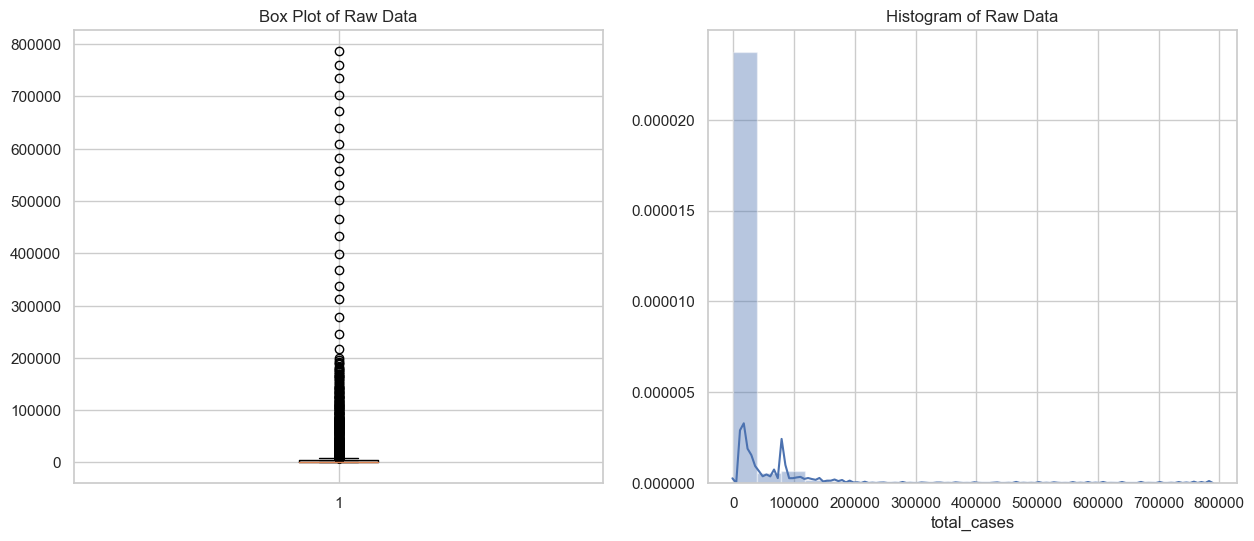

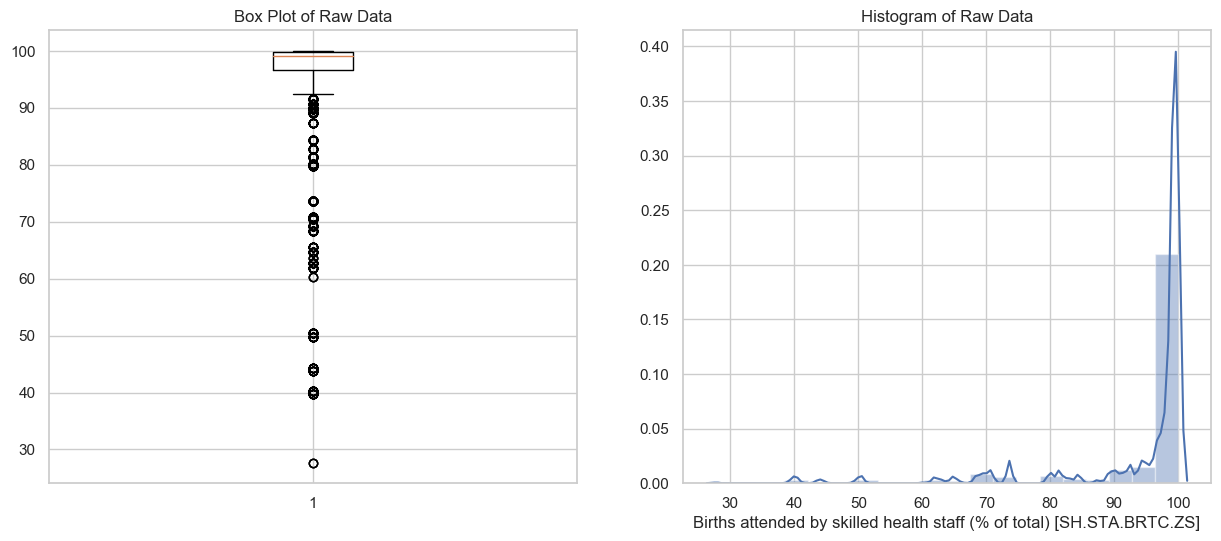

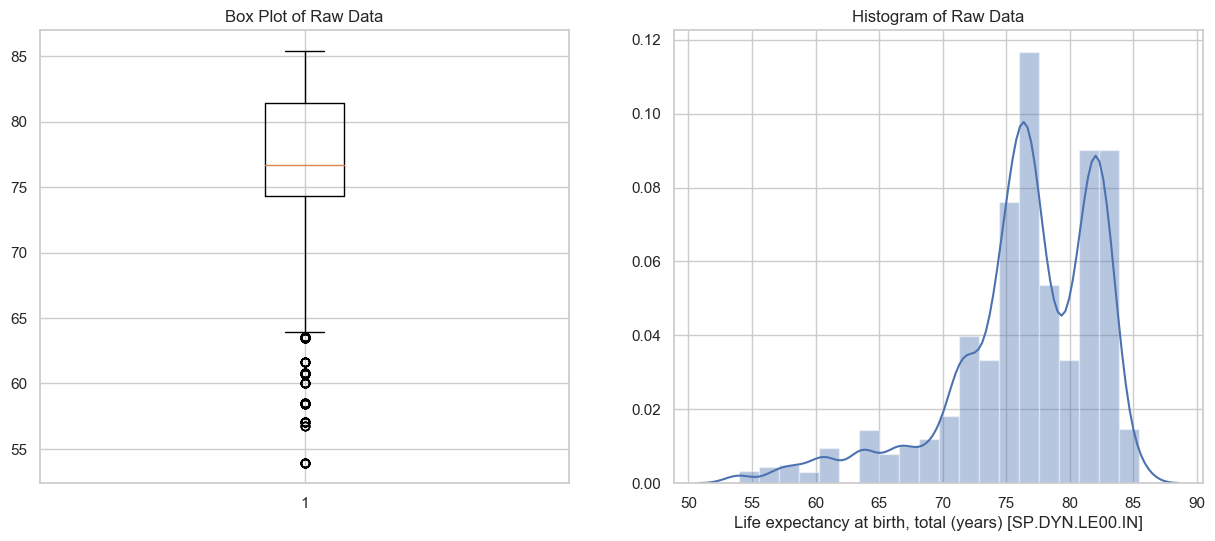

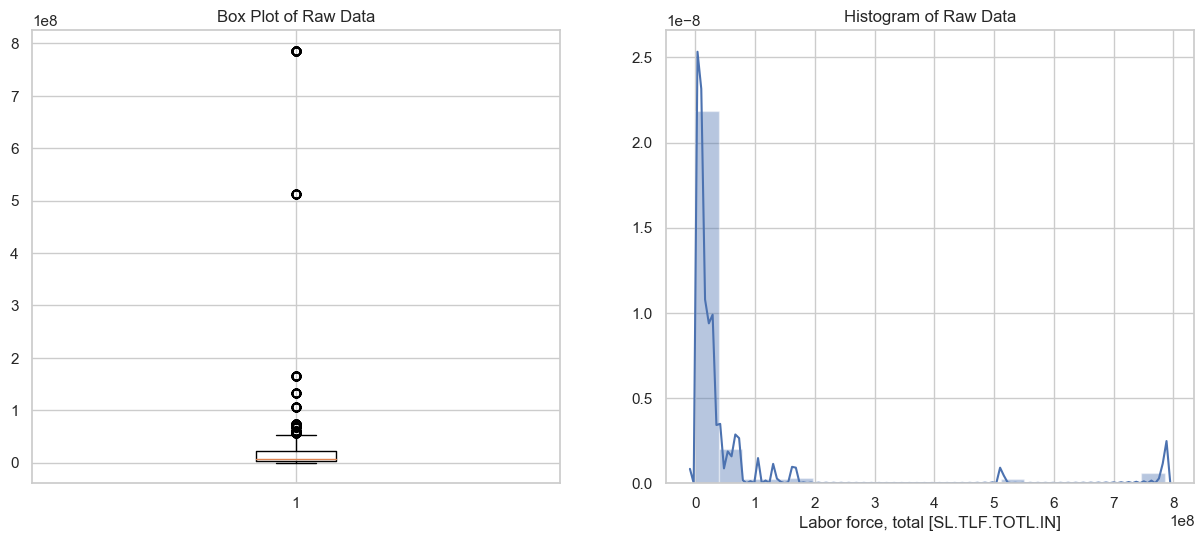

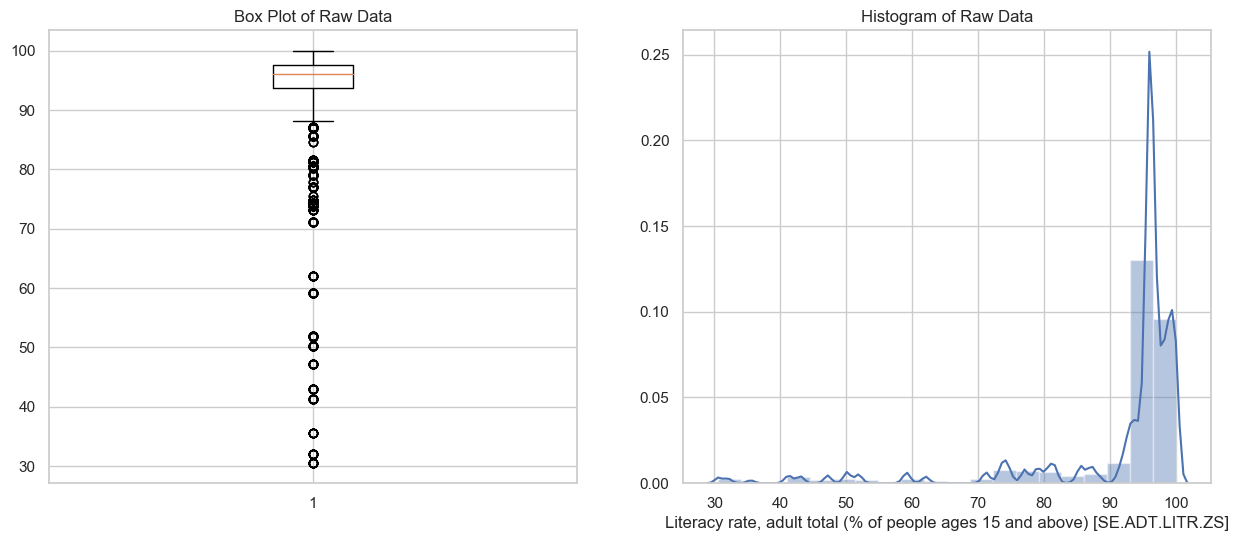

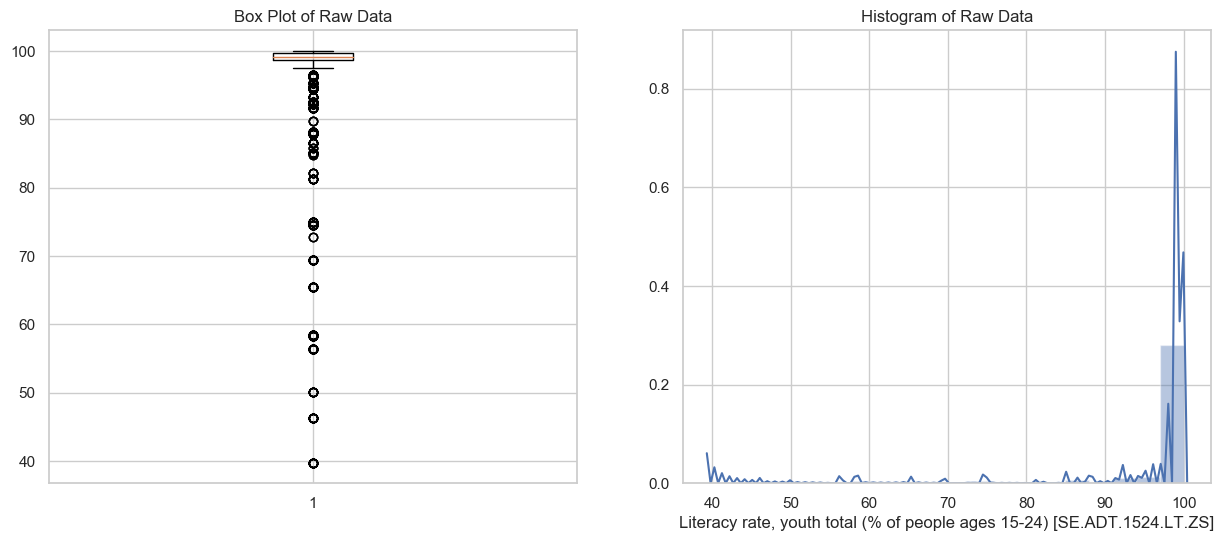

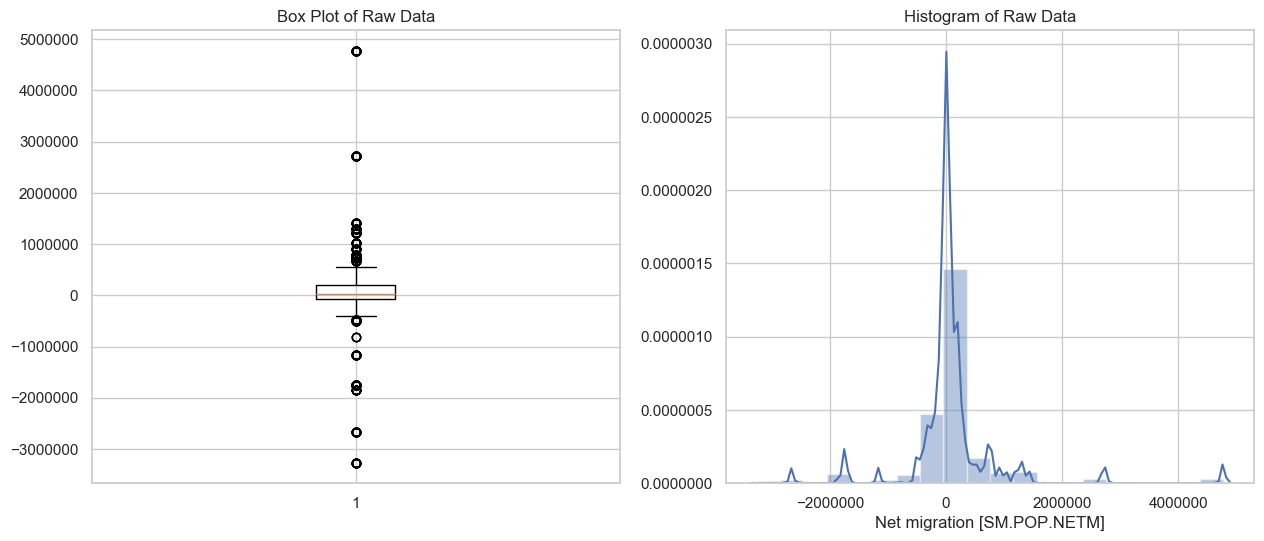

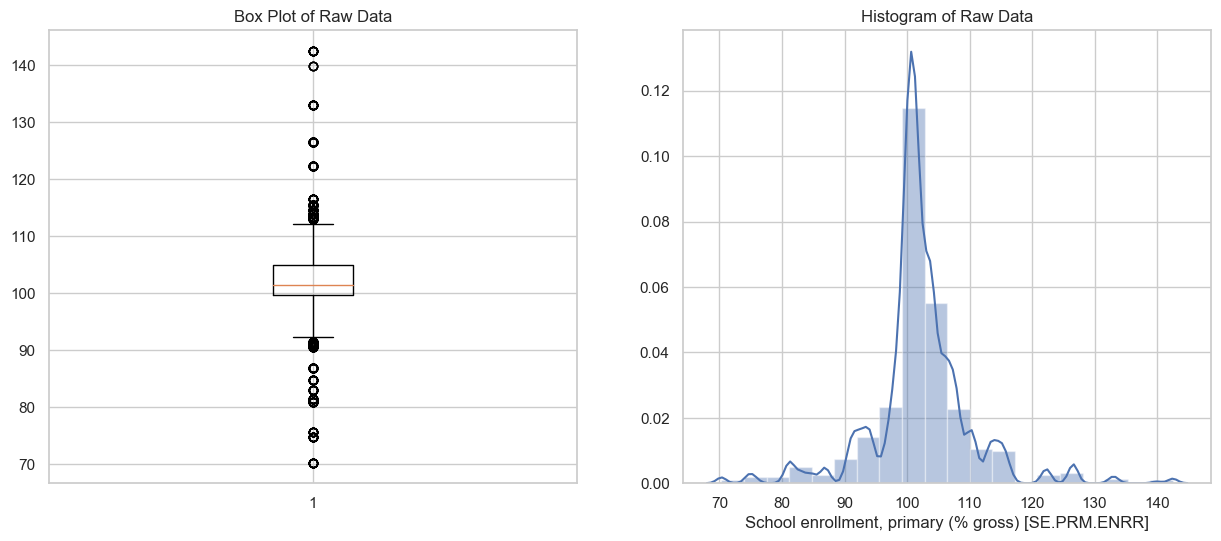

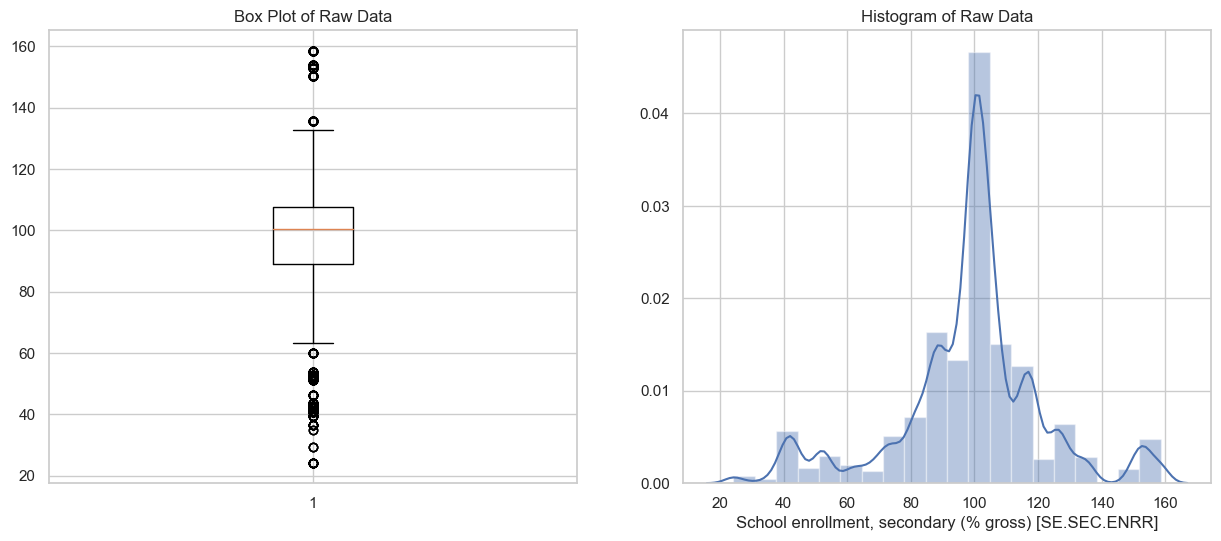

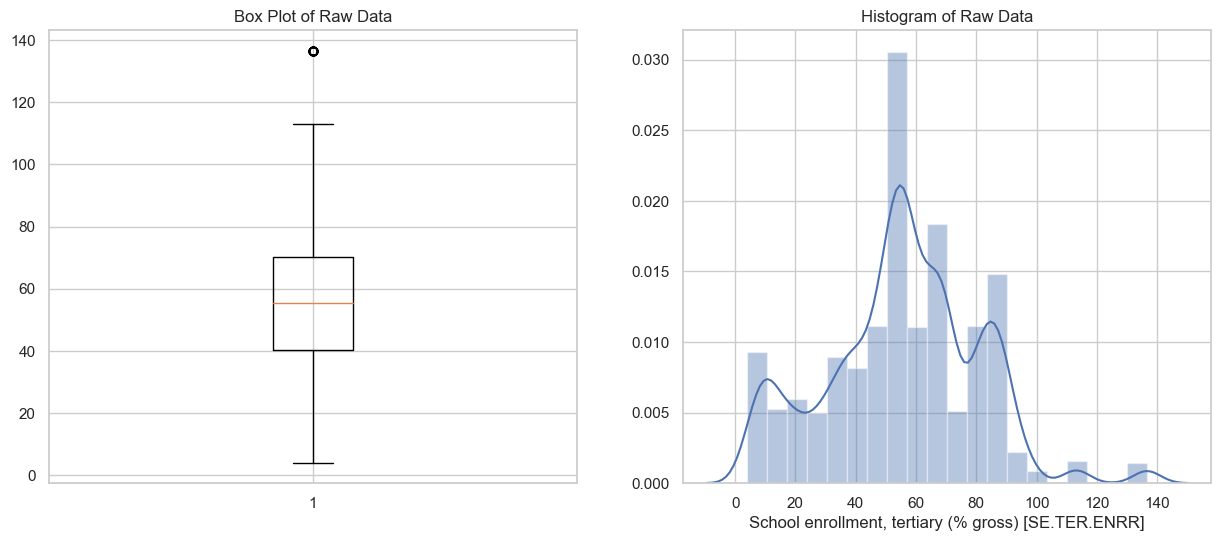

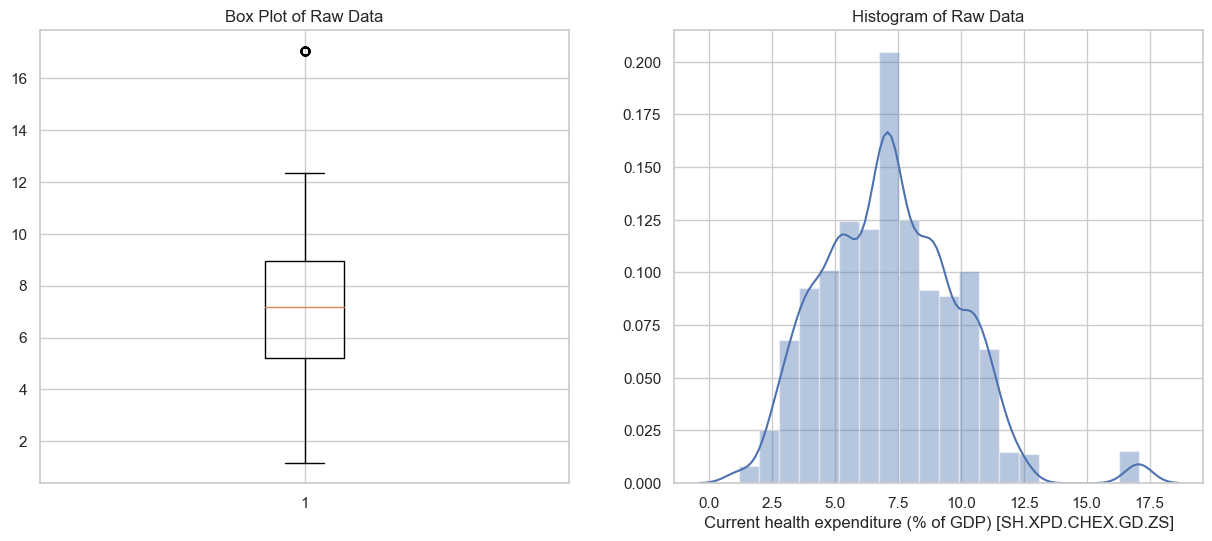

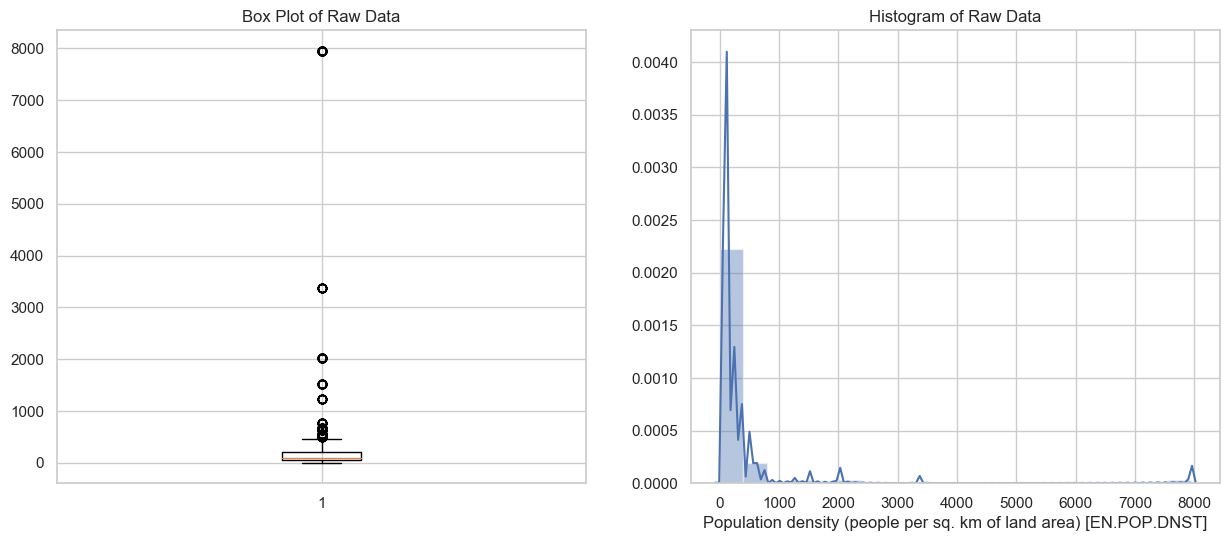

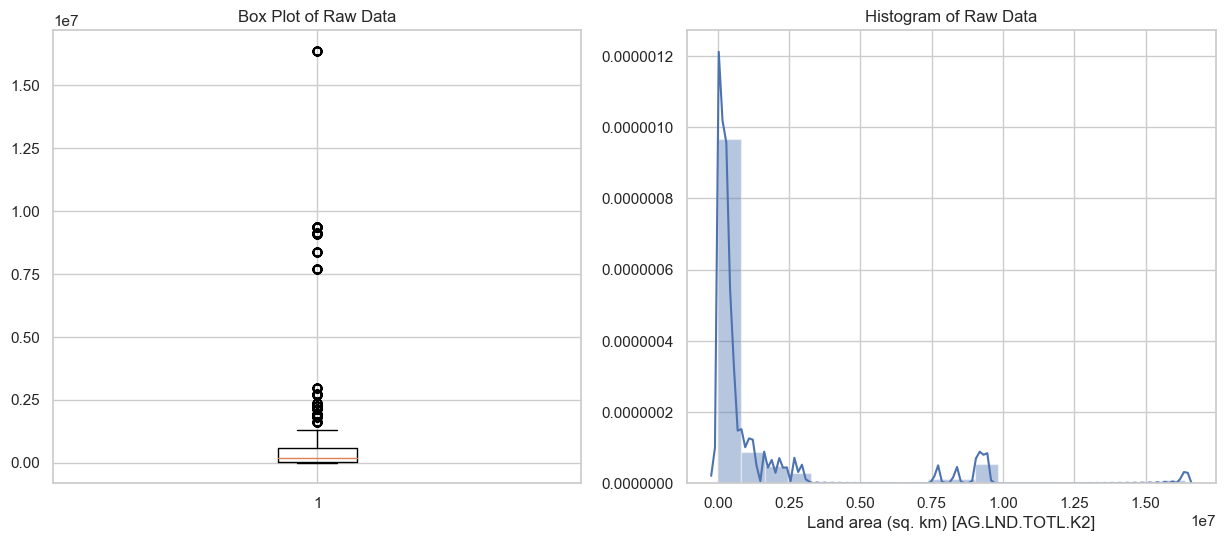

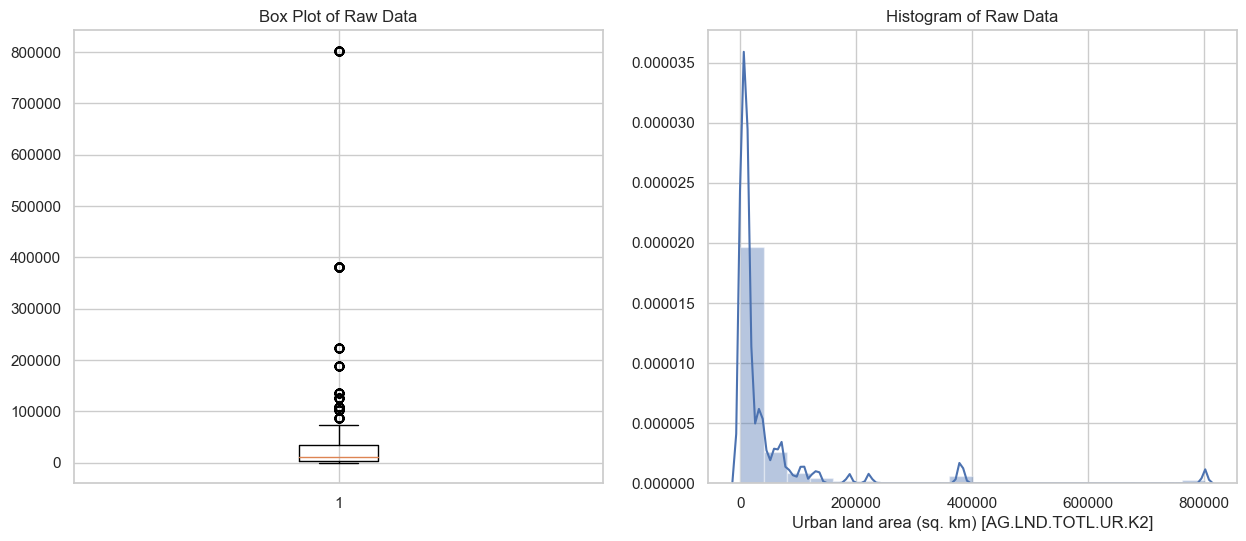

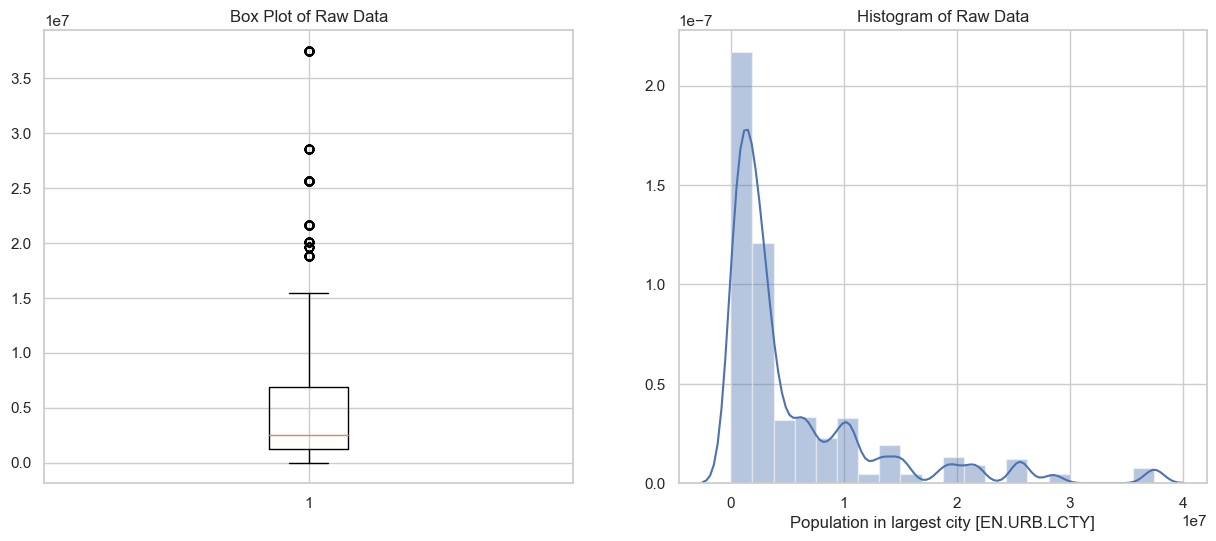

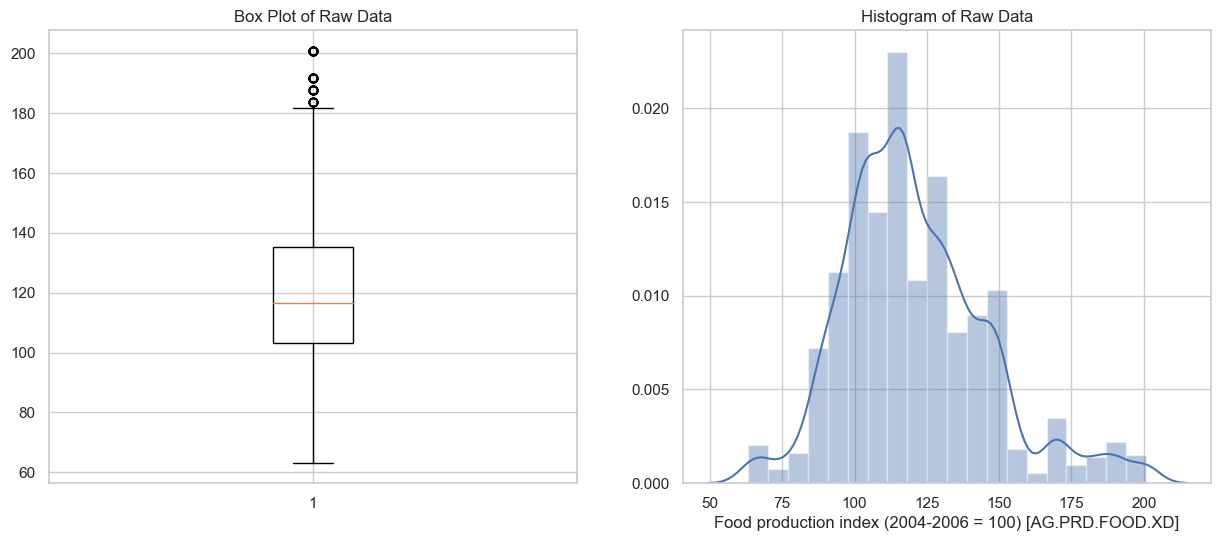

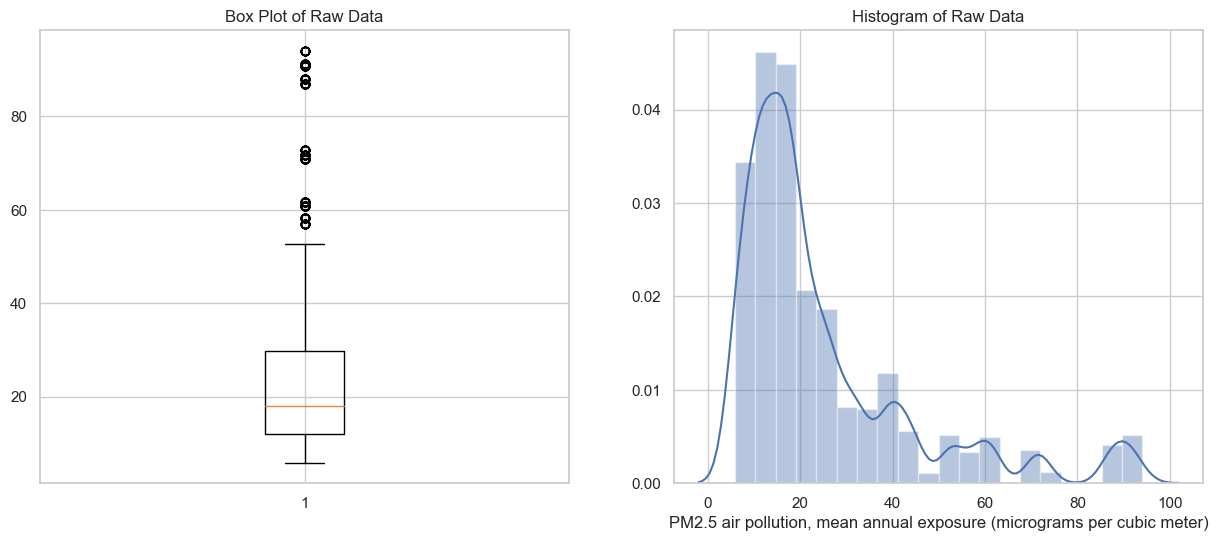

In [23]:
for feature in df_merged:
    if df_merged[feature].dtypes == object:
        continue
    else:
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.boxplot(df_merged[feature])
        plt.title("Box Plot of Raw Data")
        plt.subplot(1,2,2)
        sns.distplot(df_merged[feature],bins=20)
        plt.title("Histogram of Raw Data")
        plt.show()

### Plots for log transformed features (except "Net migration [SM.POP.NETM]", since it has negative values) 

In [24]:
df_log = pd.DataFrame()
for feature in df_merged:
    if df_merged[feature].dtypes == object:
        continue
    elif feature == "Net migration [SM.POP.NETM]":
        pass
    else:
        df_log[feature] = np.log(df_merged[feature])

In [25]:
df_log

total_cases  \
109          4.663   
110          4.736   
111          4.949   
112          5.112   
113          5.257   
...            ...   
11827        7.865   
11828        7.931   
11829        8.018   
11830        8.058   
11831        8.102   

       Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
109                                                3.922                       
110                                                3.922                       
111                                                3.922                       
112                                                3.922                       
113                                                3.922                       
...                                                  ...                       
11827                                              4.572                       
11828                                              4.572                       
11829                                              4.572                       
11830                                              4.572                       
11831                                              4.572                       

       Life expectancy at birth, total (years) [SP.DYN.LE00.IN]  \
109                                                4.161          
110                                                4.161          
111                                                4.161          
112                                                4.161          
113                                                4.161          
...                                                  ...          
11827                                              4.152          
11828                                              4.152          
11829                                              4.152          
11830                                              4.152          
11831                                              4.152          

       Labor force, total [SL.TLF.TOTL.IN]  \
109                                 16.451   
110                                 16.451   
111                                 16.451   
112                                 16.451   
113                                 16.451   
...                                    ...   
11827                               16.940   
11828                               16.940   
11829                               16.940   
11830                               16.940   
11831                               16.940   

       Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]  \
109                                                3.762                             
110                                                3.762                             
111                                                3.762                             
112                                                3.762                             
113                                                3.762                             
...                                                  ...                             
11827                                              4.466                             
11828                                              4.466                             
11829                                              4.466                             
11830                                              4.466                             
11831                                              4.466                             

       Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]  \
109                                                4.181                         
110                                                4.181                         
111                                                4.181                         
112                                                4.181      

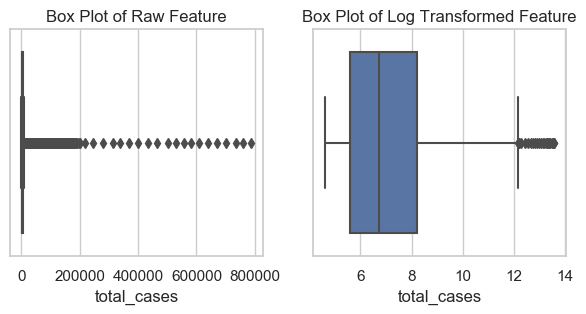

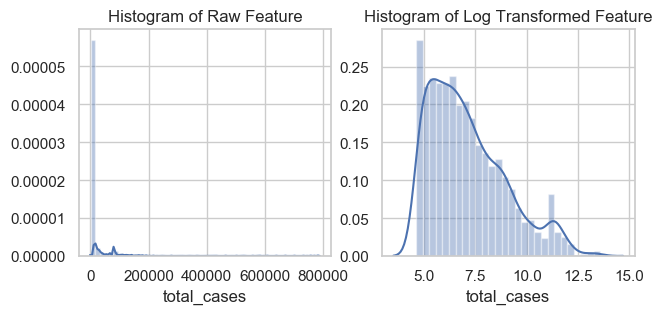

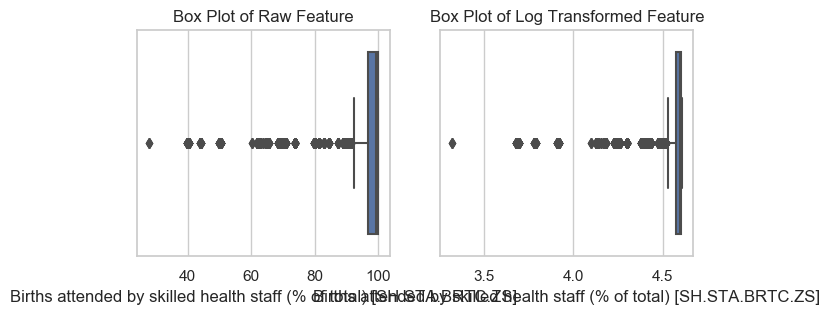

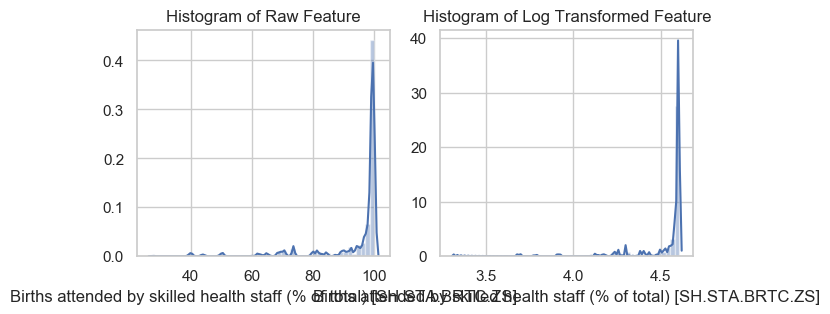

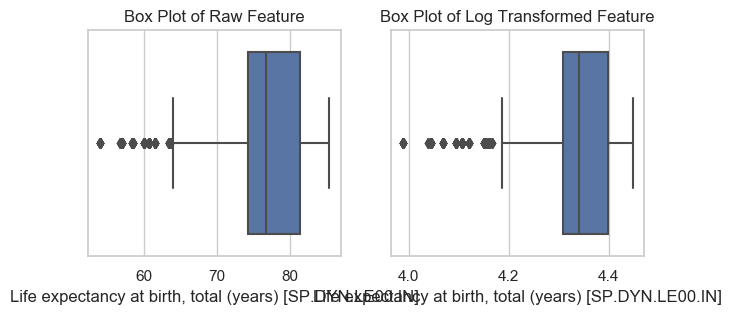

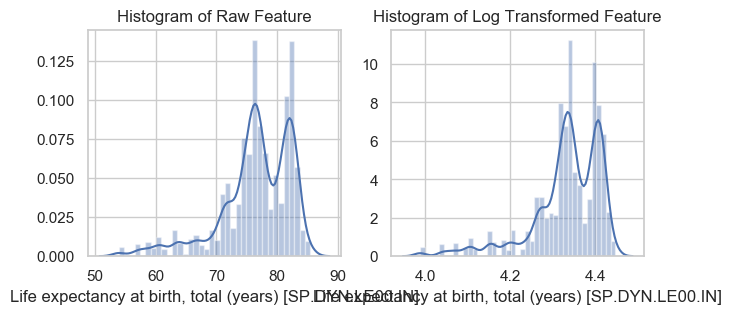

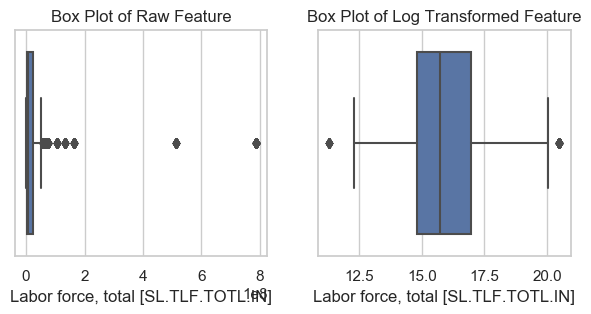

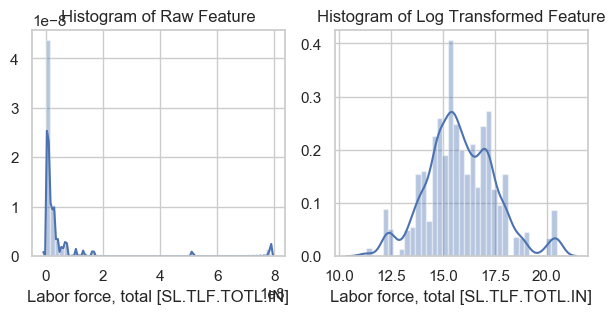

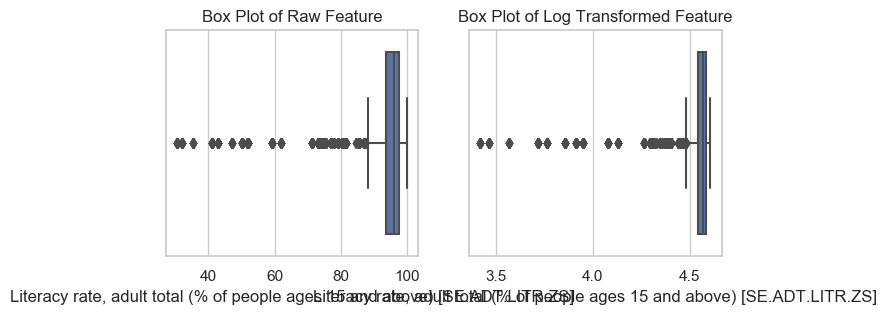

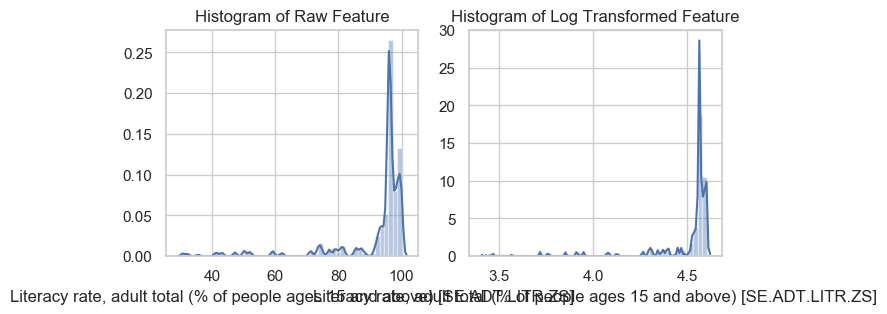

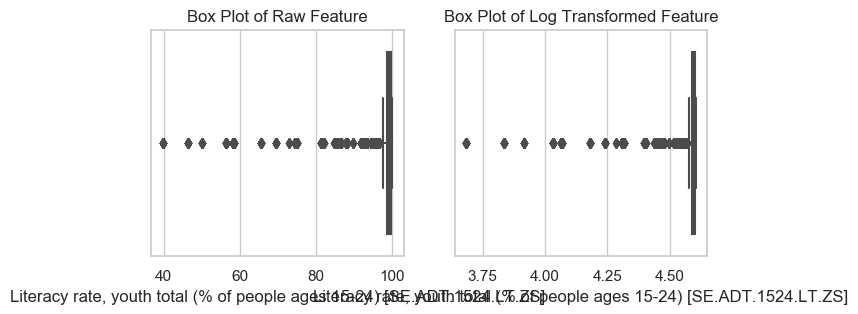

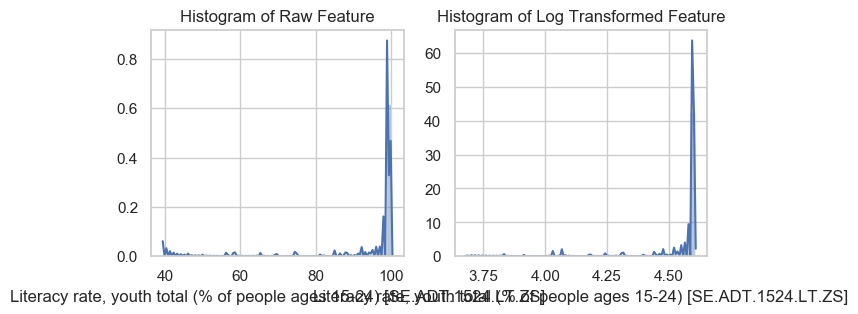

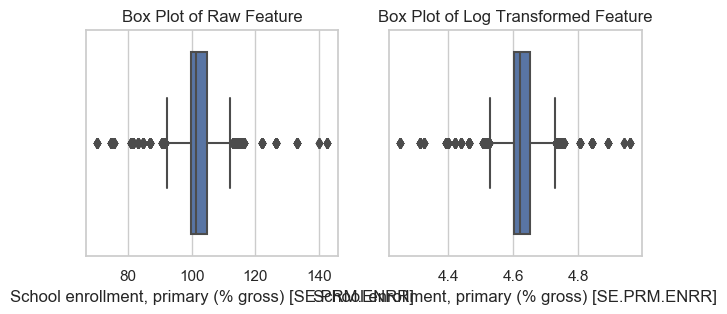

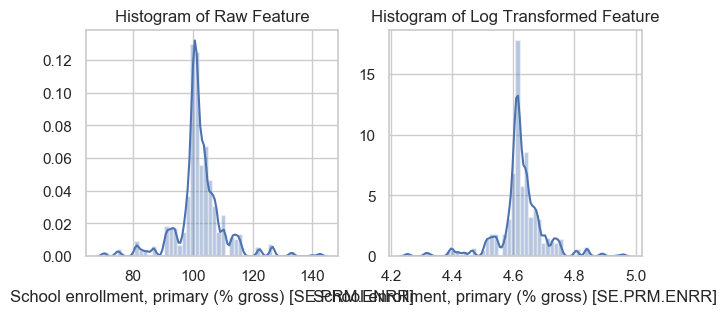

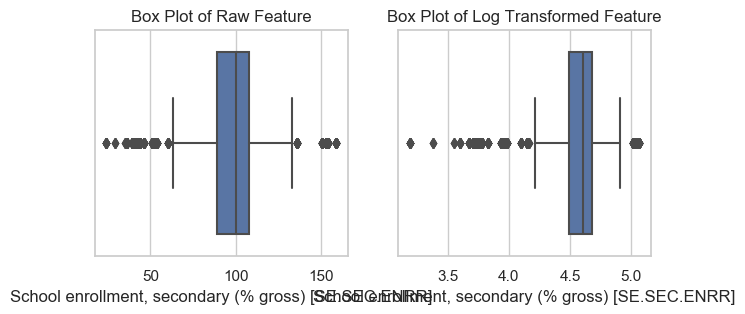

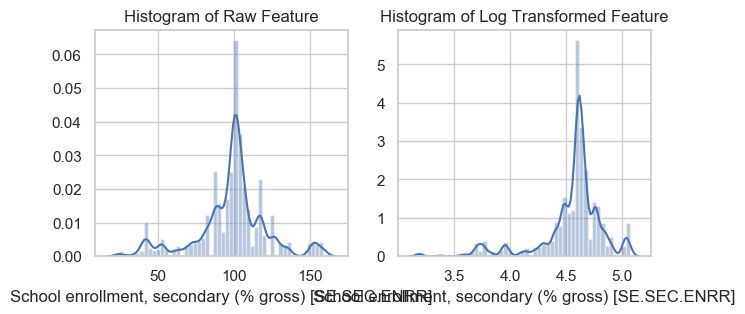

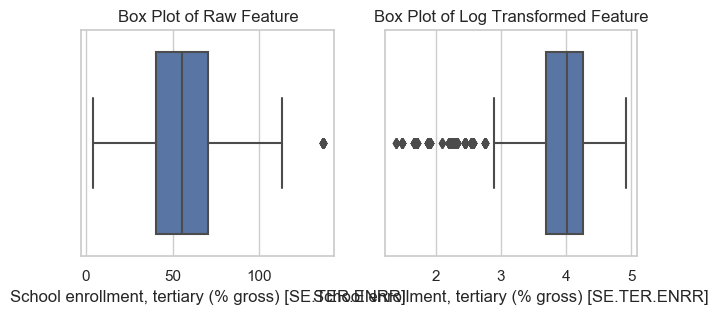

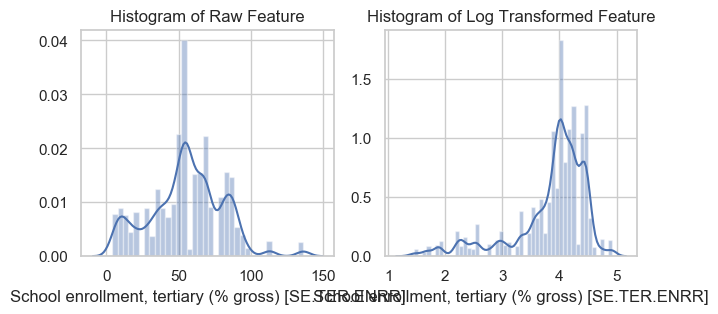

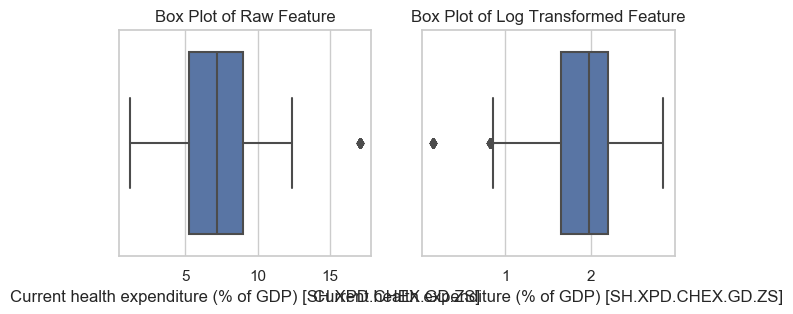

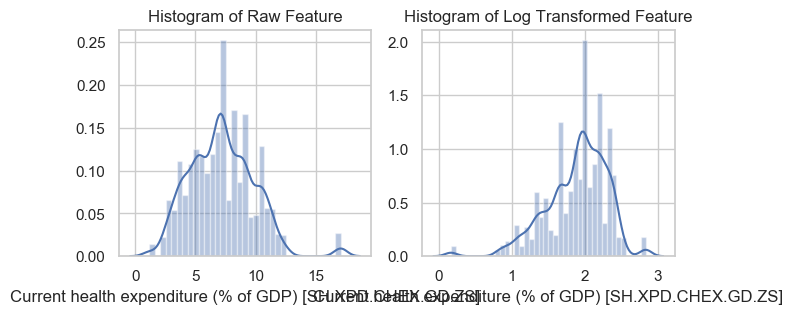

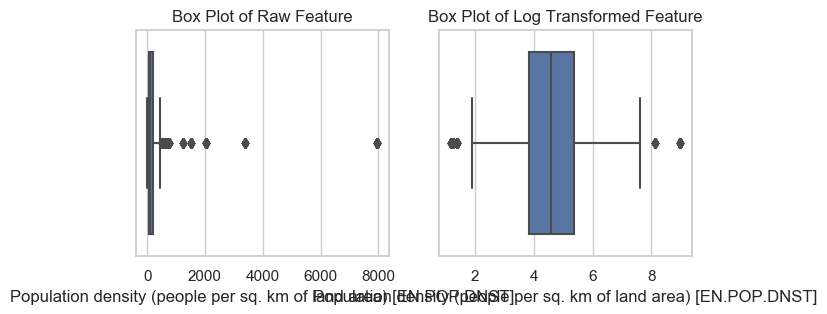

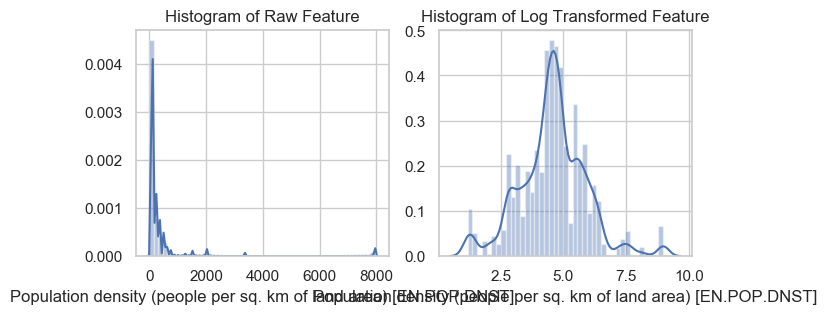

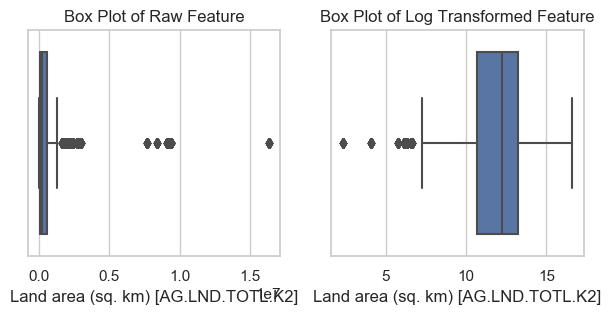

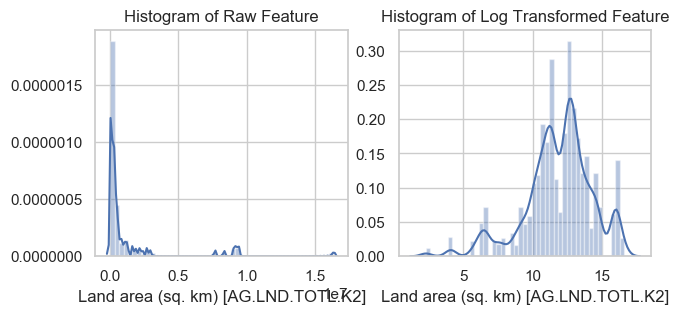

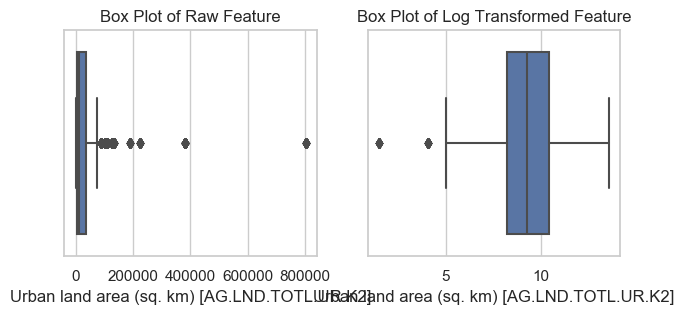

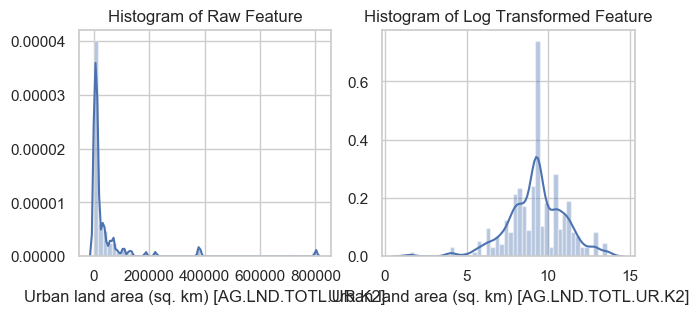

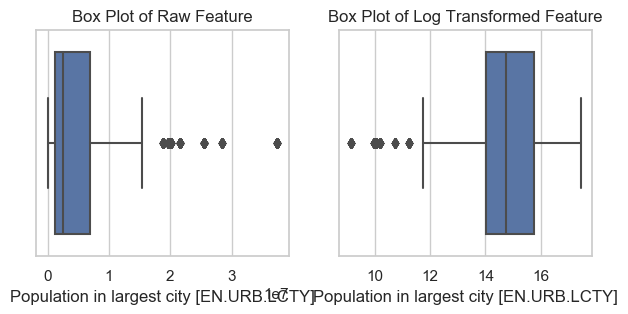

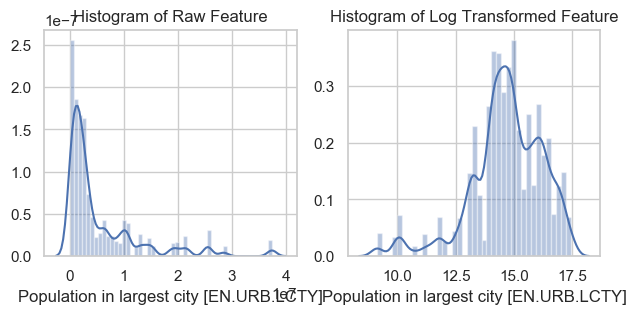

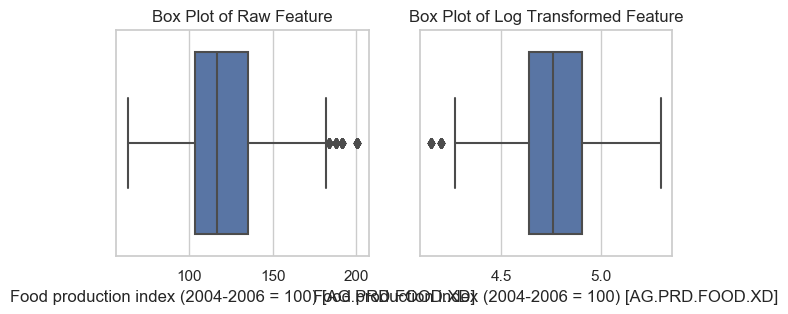

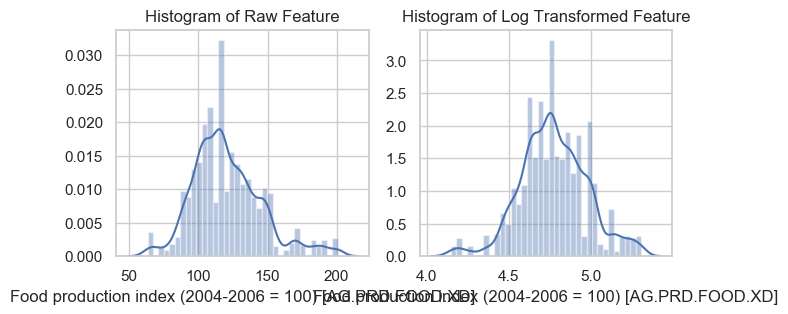

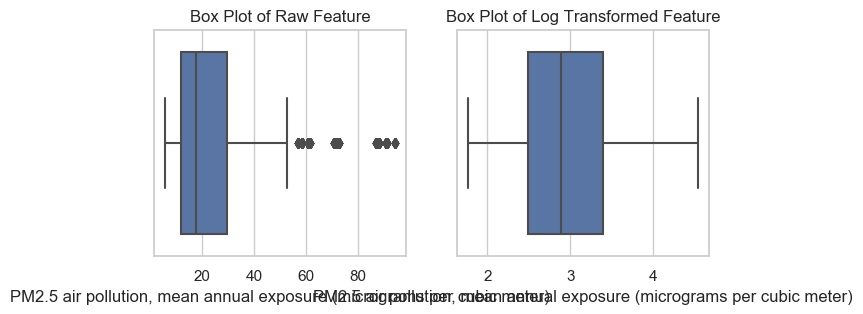

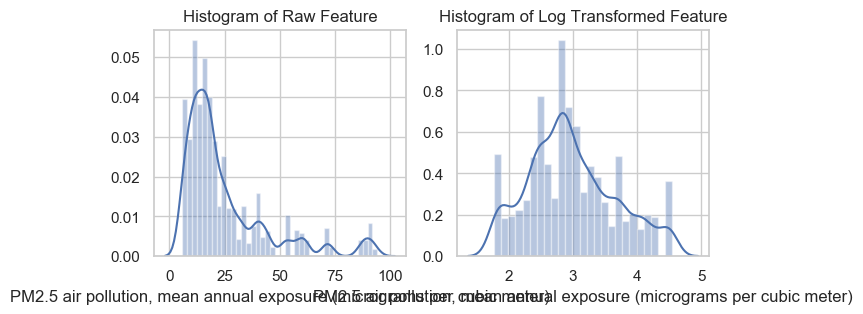

In [48]:
for feature in df_log:
    if df_log[feature].dtypes == object:
        pass
    else:
        plt.figure(figsize=(15,3))
        plt.subplot(1,4,1)
        sns.boxplot(df_merged[feature])
        plt.title("Box Plot of Raw Feature")
        plt.subplot(1,4,2)
        sns.boxplot(df_log[feature])
        plt.title("Box Plot of Log Transformed Feature")
        plt.show()
        
        plt.figure(figsize=(15,3))
        plt.subplot(1,4,3)
        sns.distplot(df_merged[feature])
        plt.title("Histogram of Raw Feature")
        plt.subplot(1,4,4)
        sns.distplot(df_log[feature])
        plt.title("Histogram of Log Transformed Feature")
        plt.show()

### Plots of winsorized features (Except "total cases")

In [27]:
df_wins = pd.DataFrame()
for feature in df_merged:
    if df_merged[feature].dtypes == object:
        pass
    elif feature == "total_cases":
        df_wins[feature] = df_merged[feature]
    else:
        df_wins[feature] = winsorize(df_merged[feature],(0.05,0.05))

In [28]:
df_wins

total_cases  \
109            106   
110            114   
111            141   
112            166   
113            192   
...            ...   
11827         2605   
11828         2783   
11829         3034   
11830         3158   
11831         3300   

       Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
109                                               69.300                       
110                                               69.300                       
111                                               69.300                       
112                                               69.300                       
113                                               69.300                       
...                                                  ...                       
11827                                             96.700                       
11828                                             96.700                       
11829                                             96.700                       
11830                                             96.700                       
11831                                             96.700                       

       Life expectancy at birth, total (years) [SP.DYN.LE00.IN]  \
109                                               64.130          
110                                               64.130          
111                                               64.130          
112                                               64.130          
113                                               64.130          
...                                                  ...          
11827                                             63.538          
11828                                             63.538          
11829                                             63.538          
11830                                             63.538          
11831                                             63.538          

       Labor force, total [SL.TLF.TOTL.IN]  \
109                           13952821.000   
110                           13952821.000   
111                           13952821.000   
112                           13952821.000   
113                           13952821.000   
...                                    ...   
11827                         22756502.000   
11828                         22756502.000   
11829                         22756502.000   
11830                         22756502.000   
11831                         22756502.000   

       Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]  \
109                                               59.132                             
110                                               59.132                             
111                                               59.132                             
112                                               59.132                             
113                                               59.132                             
...                                                  ...                             
11827                                             87.047                             
11828                                             87.047                             
11829                                             87.047                             
11830                                             87.047                             
11831                                             87.047                             

       Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]  \
109                                               74.526                         
110                                               74.526                         
111                                               74.526                         
112                                               74.526      

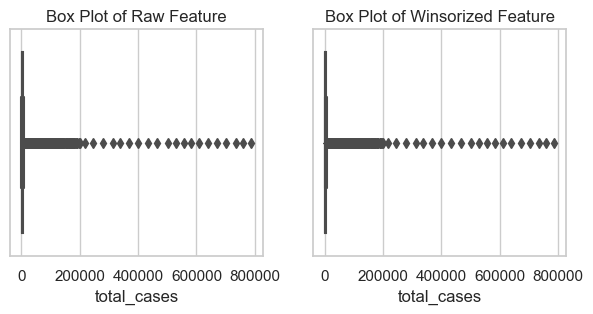

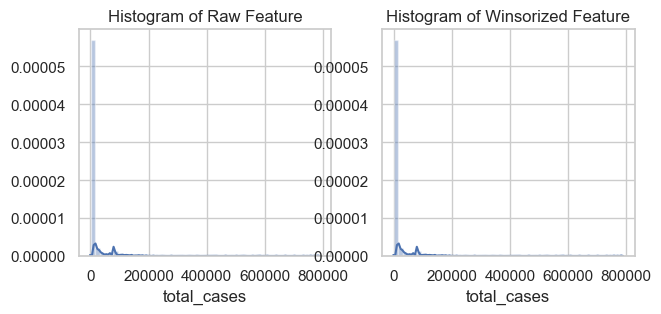

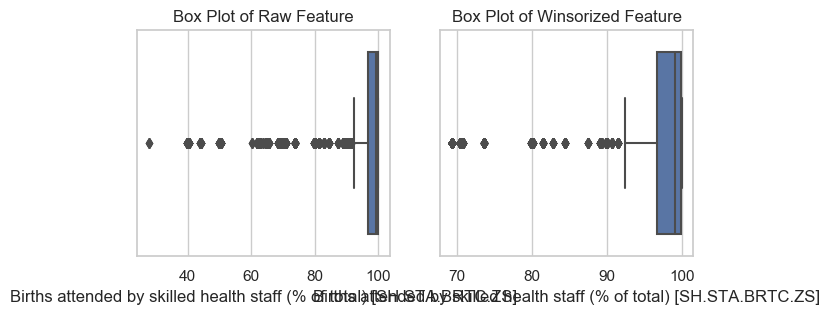

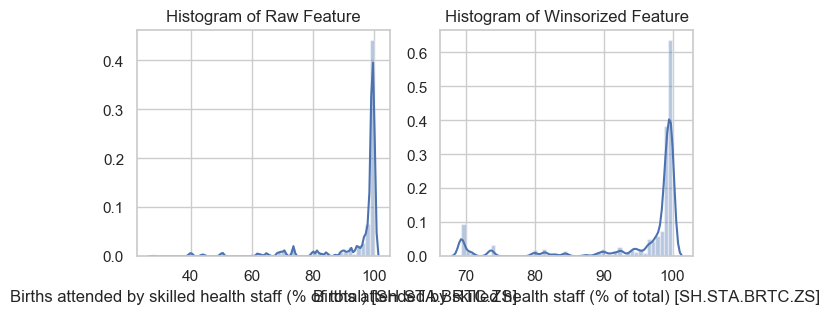

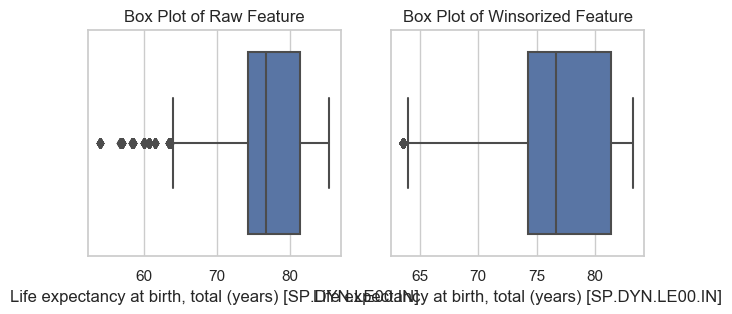

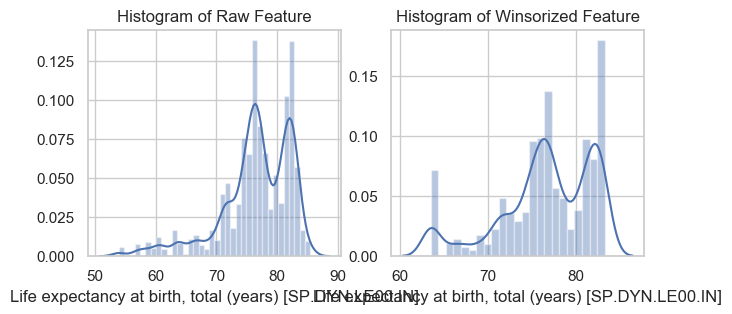

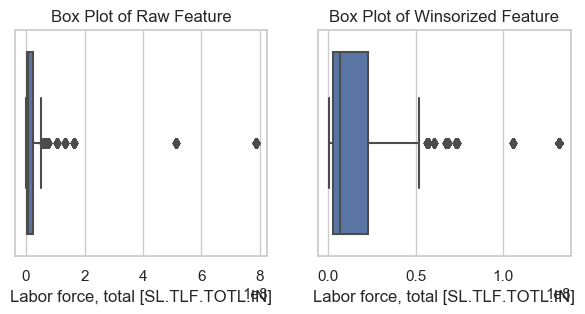

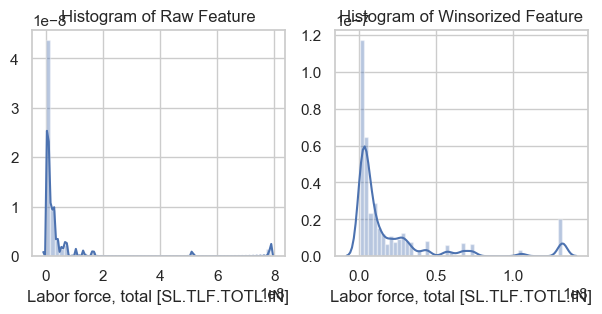

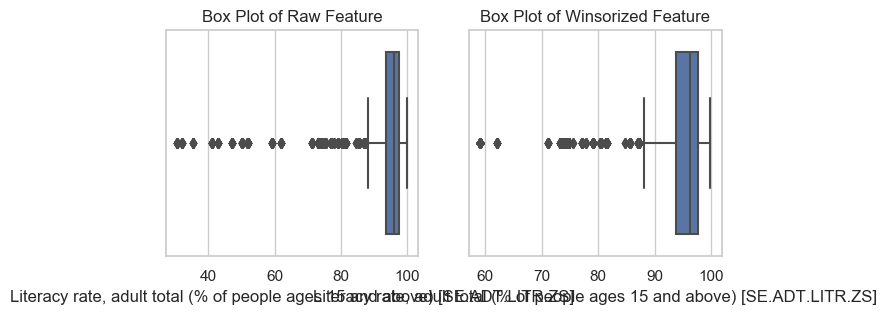

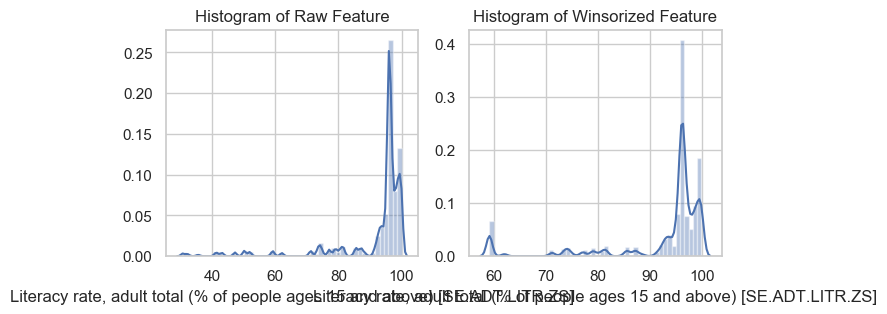

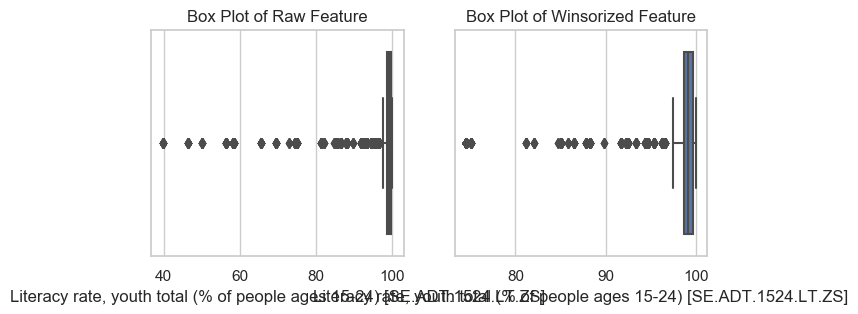

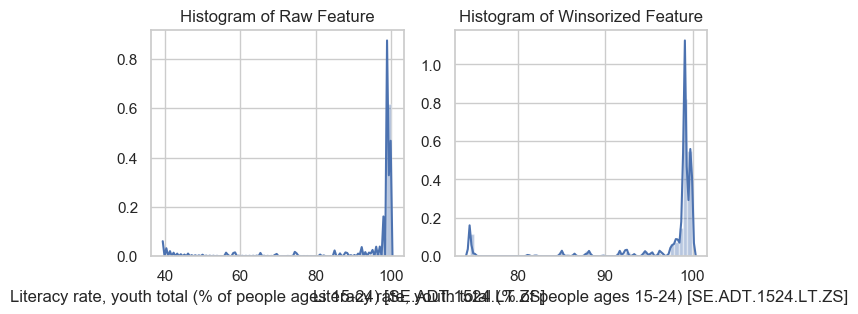

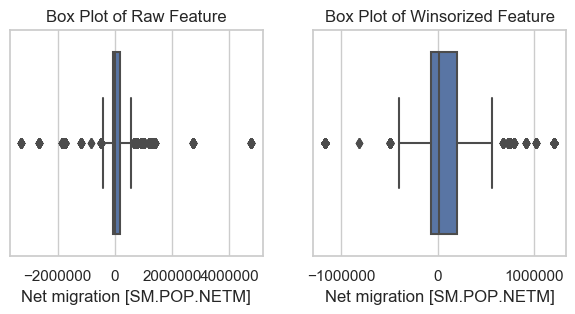

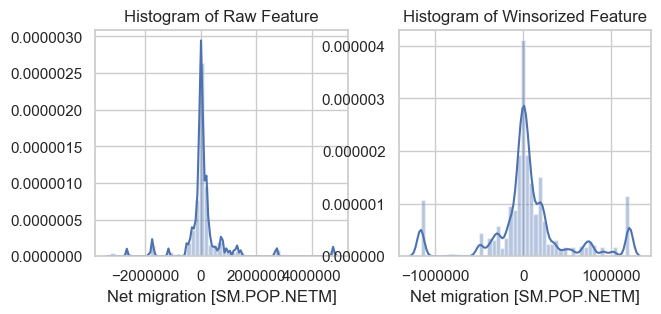

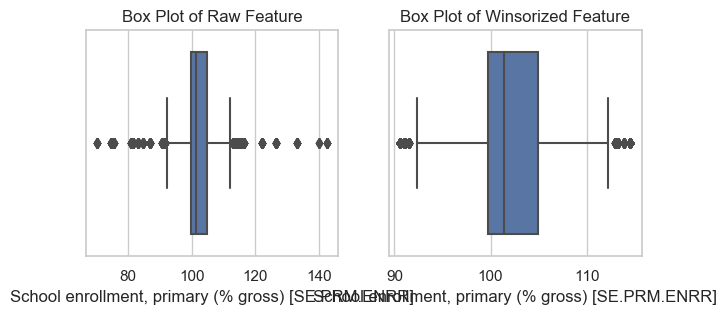

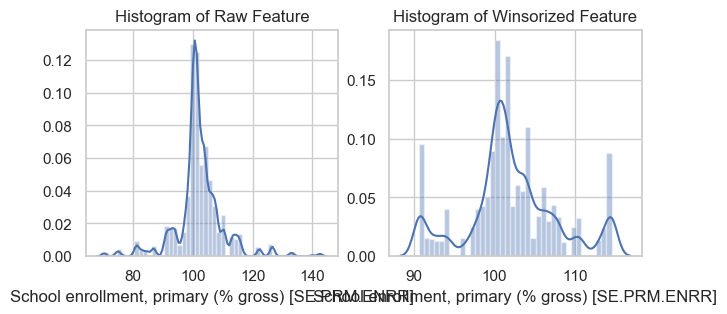

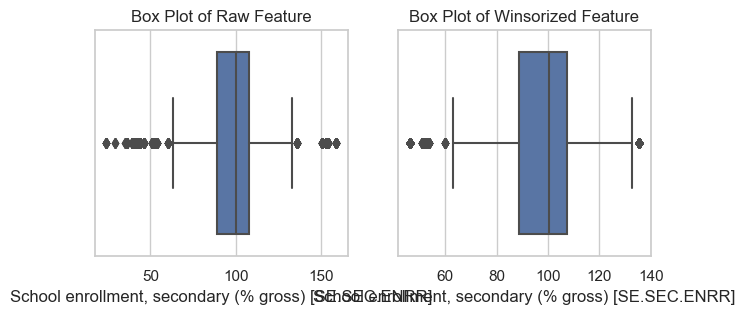

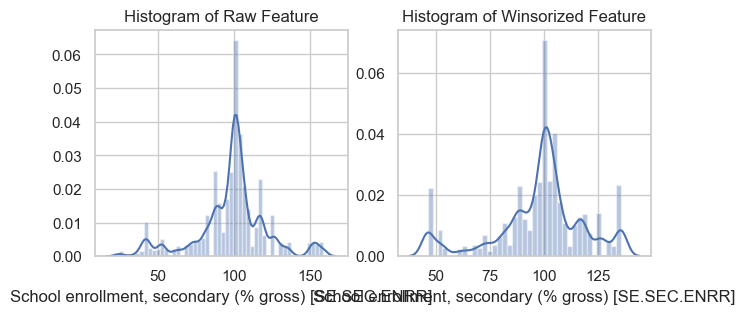

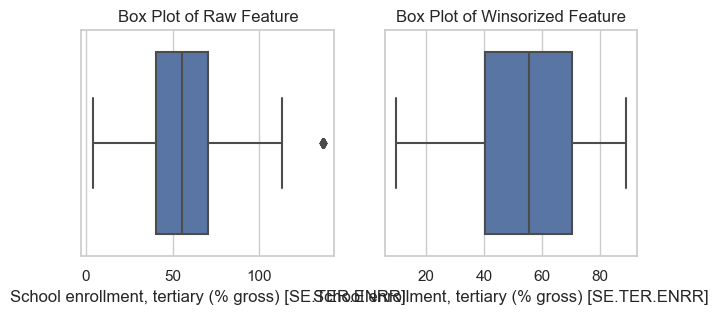

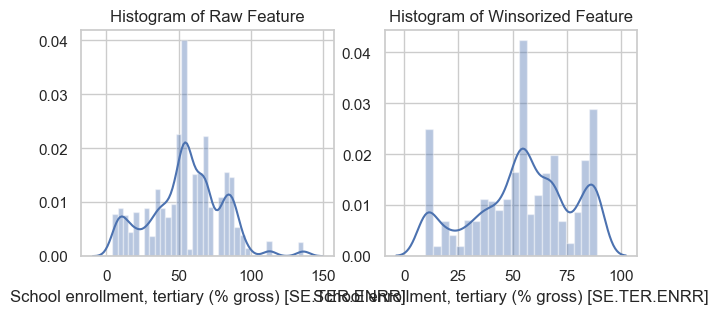

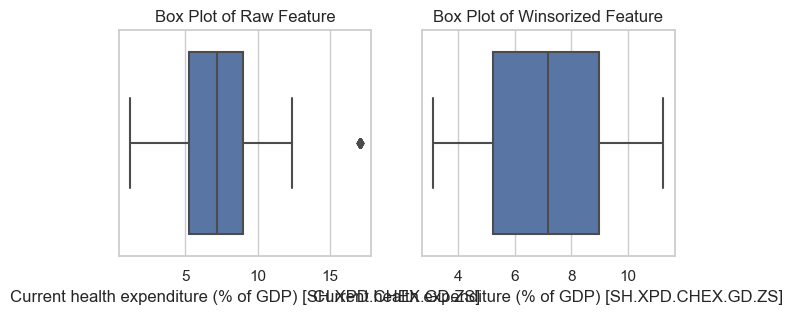

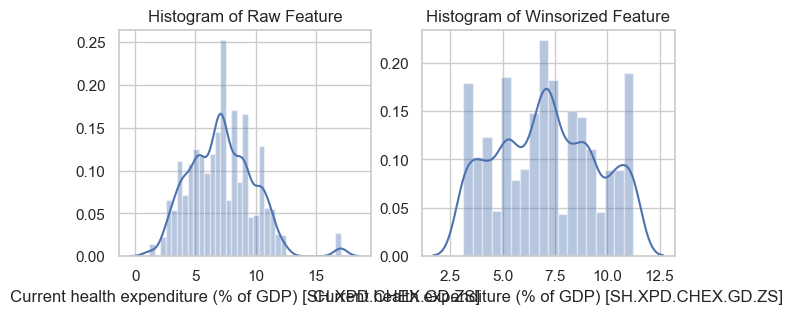

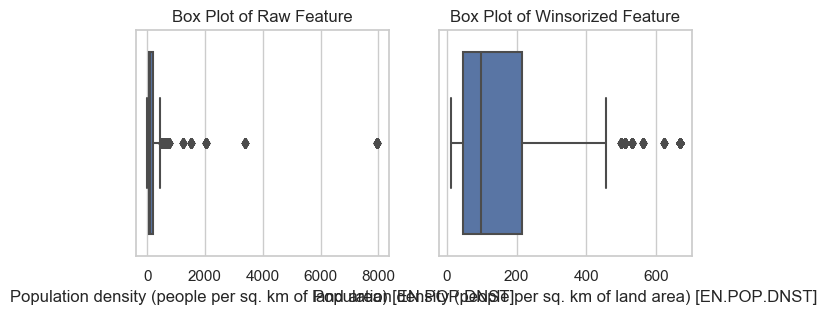

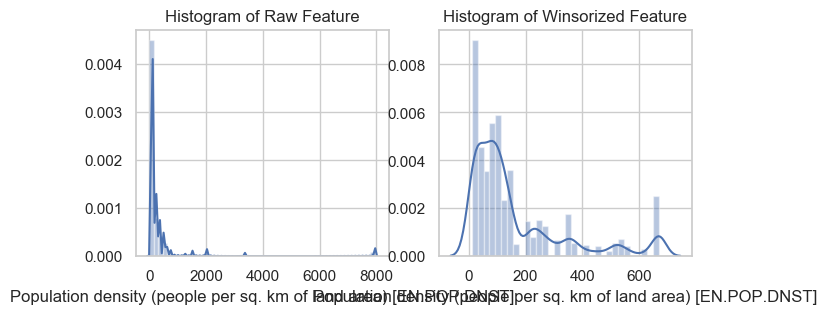

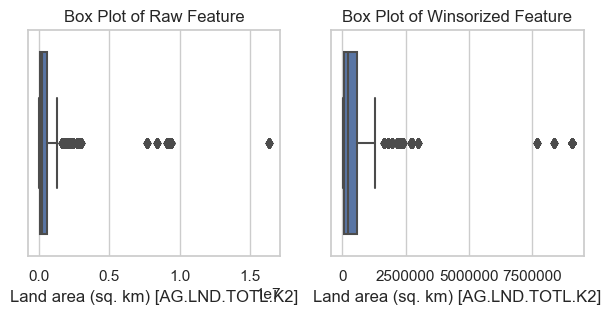

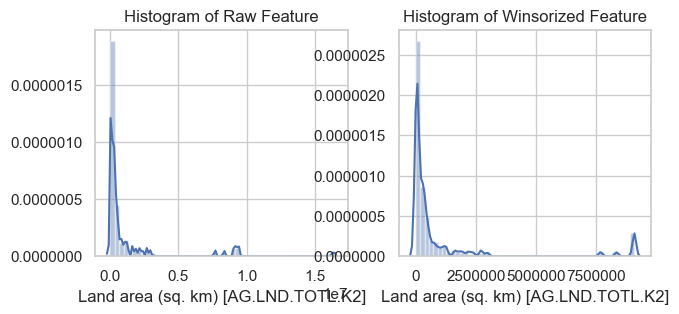

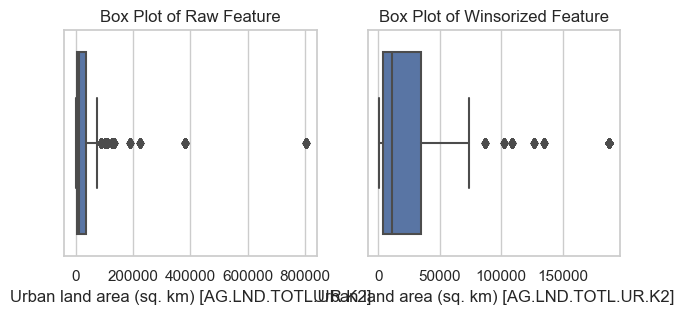

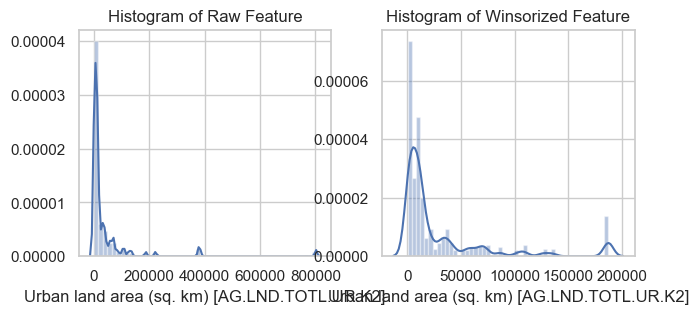

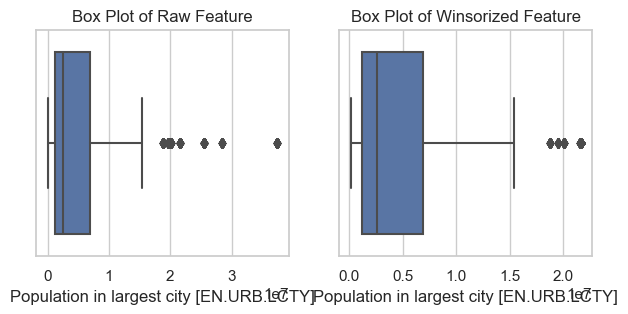

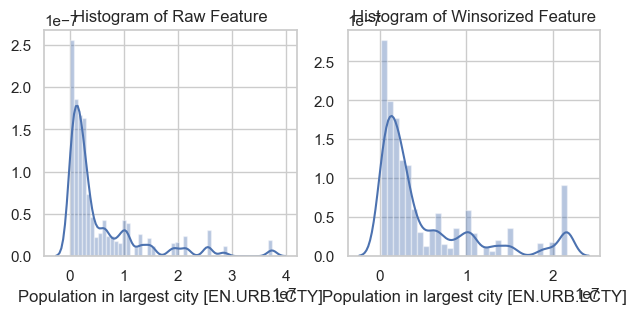

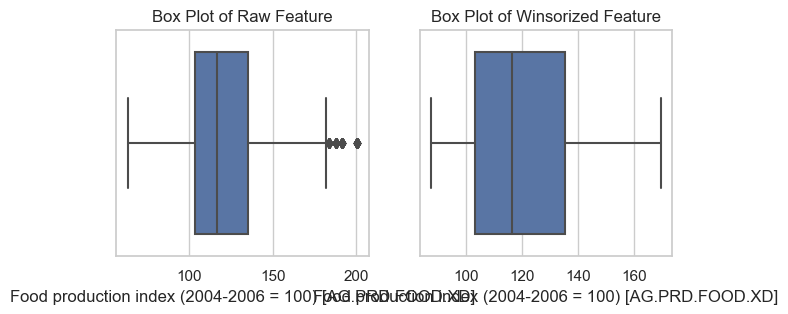

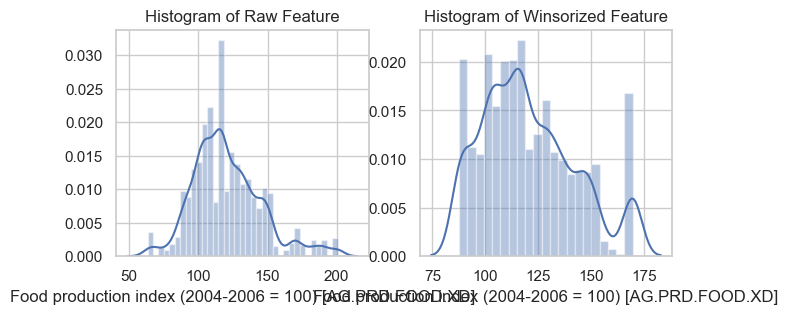

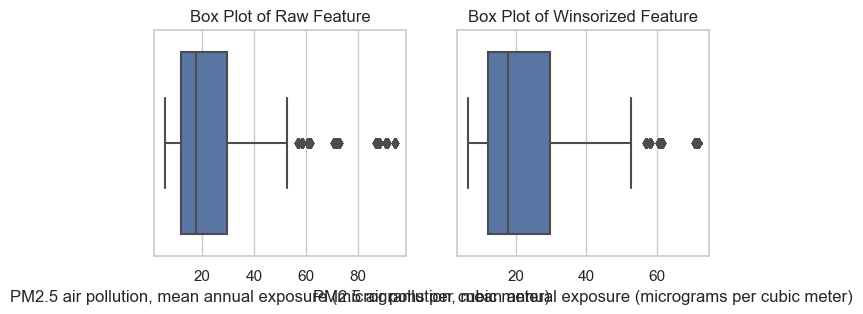

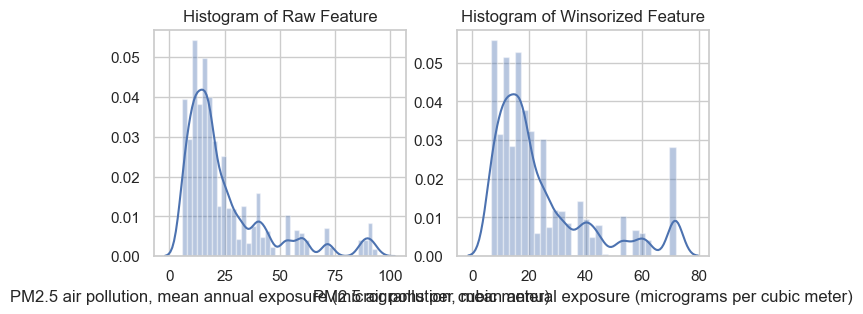

In [29]:
for feature in df_wins:
    plt.figure(figsize=(15,3))
    plt.subplot(1,4,1)
    sns.boxplot(df_merged[feature])
    plt.title("Box Plot of Raw Feature")
    plt.subplot(1,4,2)
    sns.boxplot(df_wins[feature])
    plt.title("Box Plot of Winsorized Feature")
    plt.show()
        
    plt.figure(figsize=(15,3))
    plt.subplot(1,4,3)
    sns.distplot(df_merged[feature])
    plt.title("Histogram of Raw Feature")
    plt.subplot(1,4,4)
    sns.distplot(df_wins[feature])
    plt.title("Histogram of Winsorized Feature")
    plt.show()

### Plots of both winsorized and log transformed features

In [30]:
df_wins_log = pd.DataFrame()

for feature in df_log:
    if df_merged[feature].dtypes == object:
        break
    else:
        df_wins_log[feature]= df_wins[feature].apply(np.log)

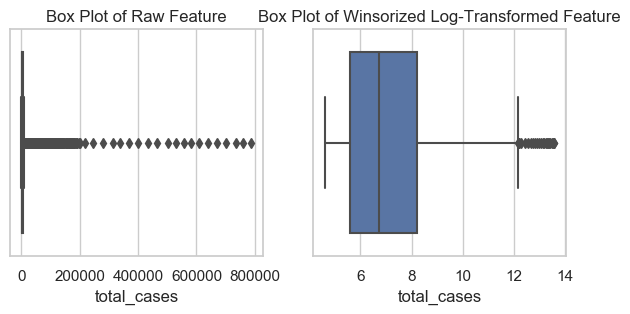

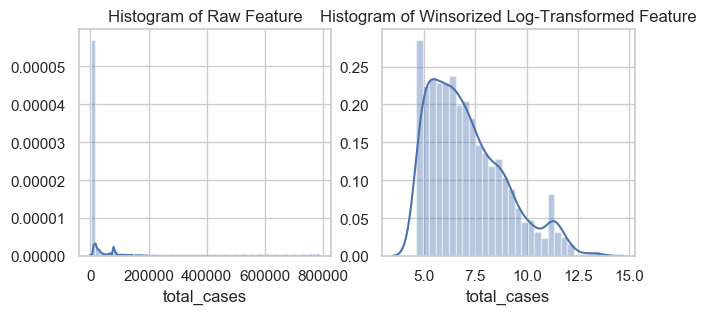

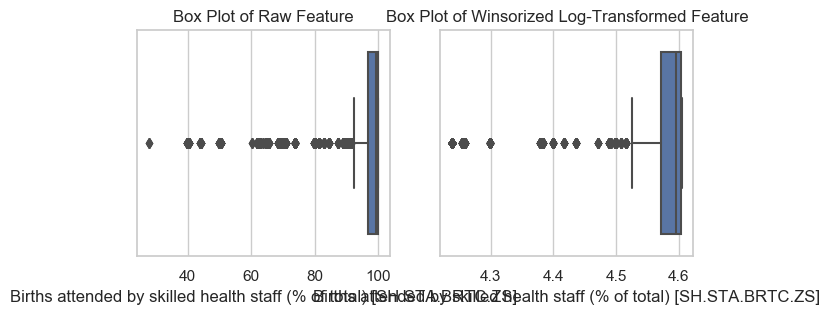

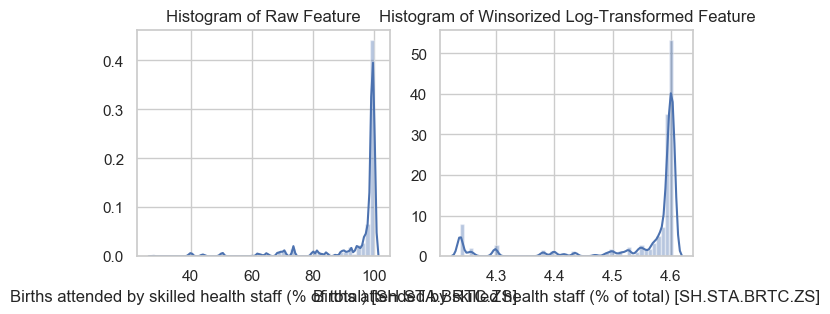

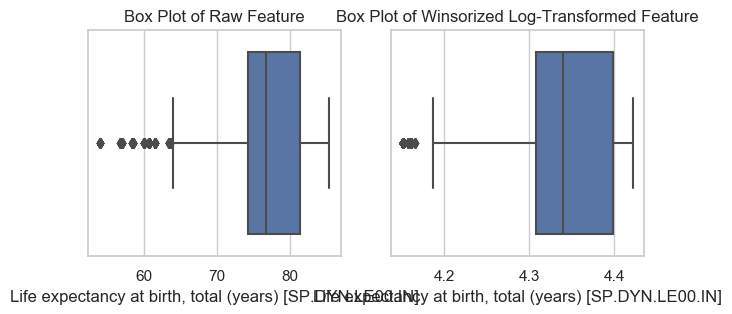

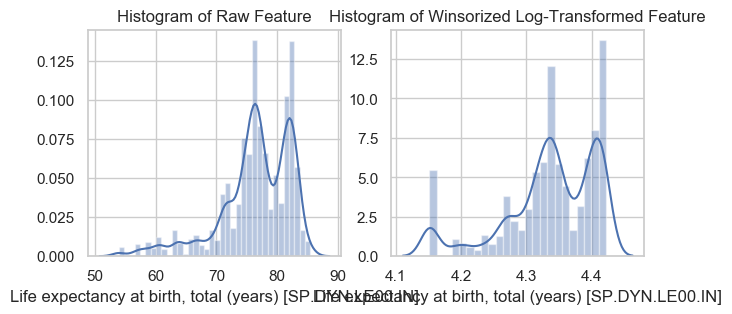

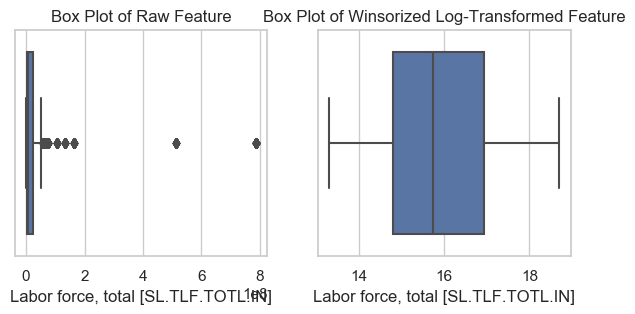

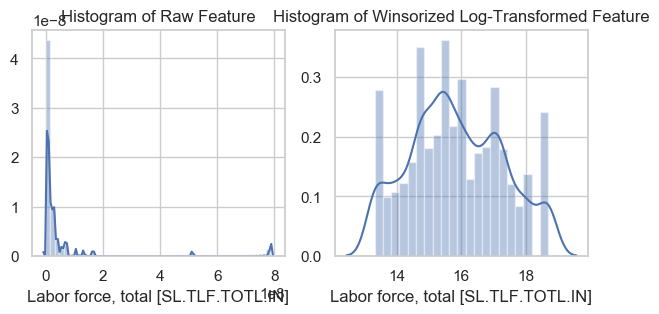

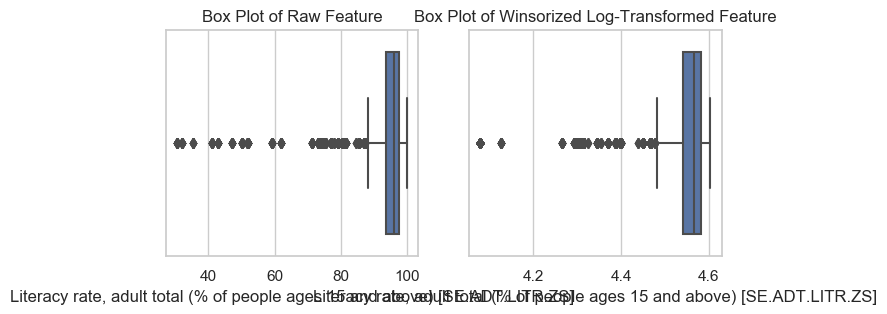

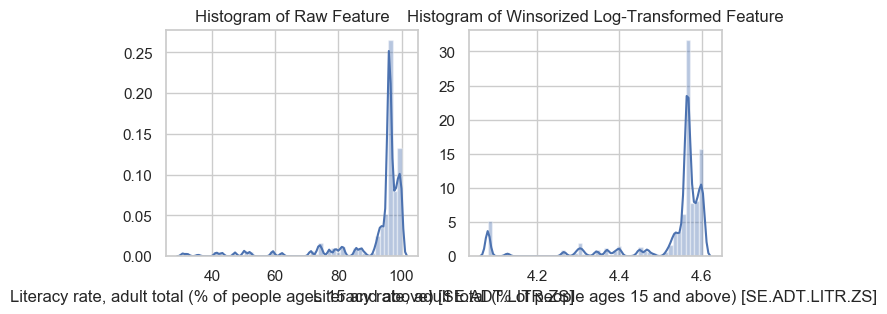

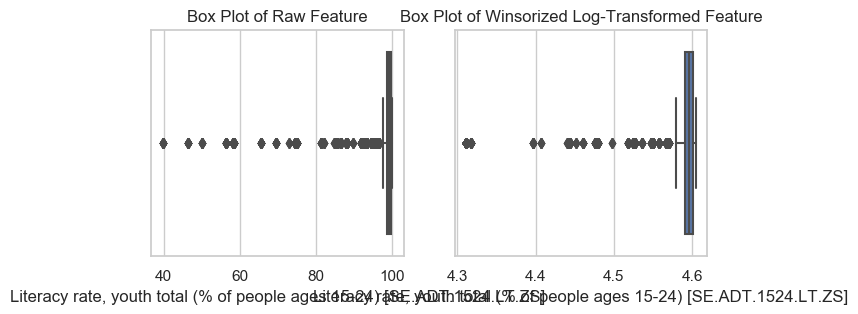

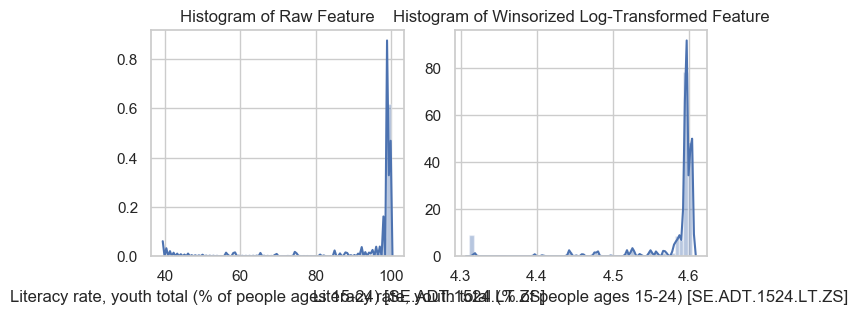

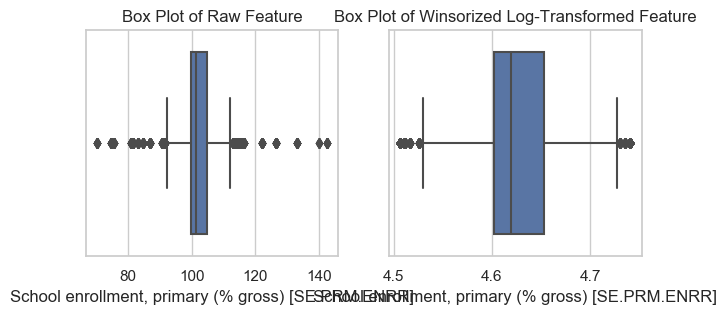

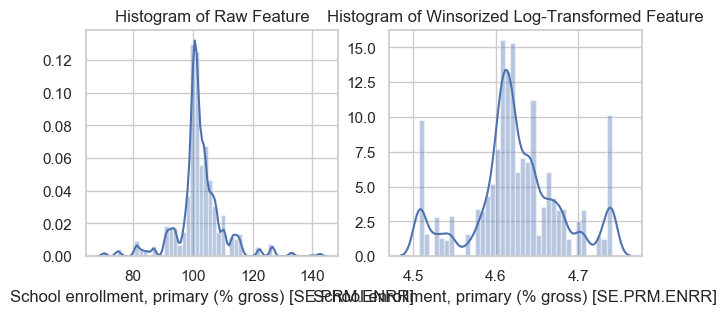

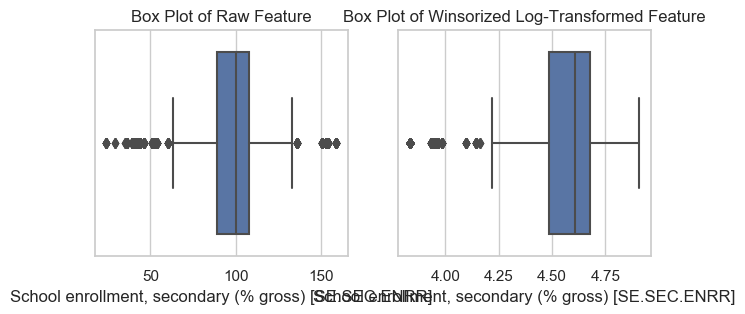

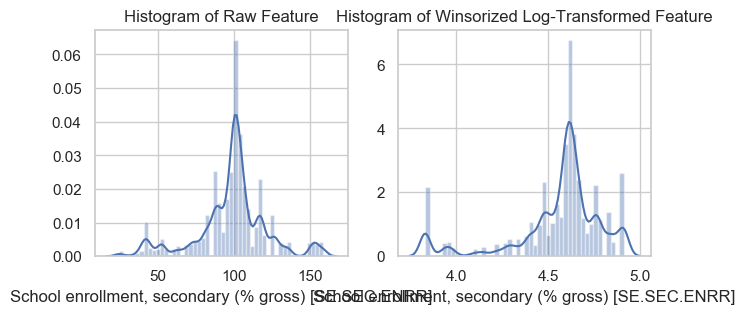

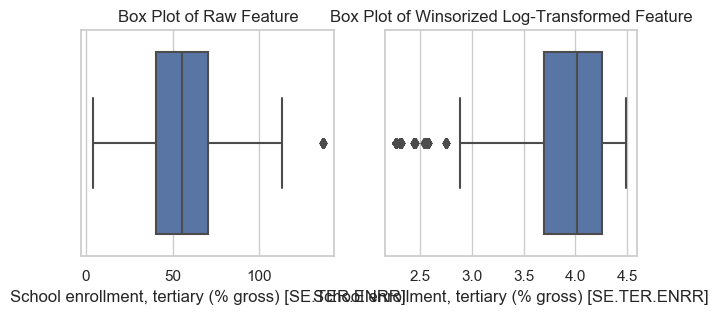

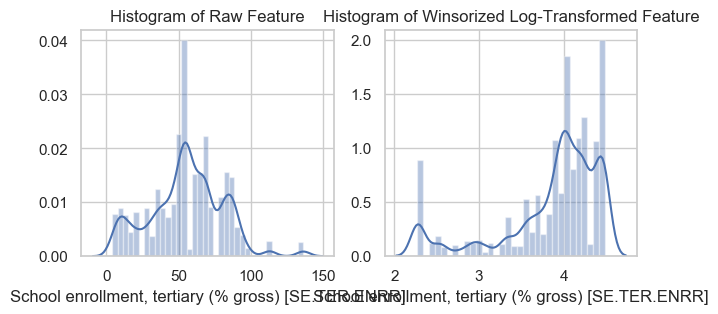

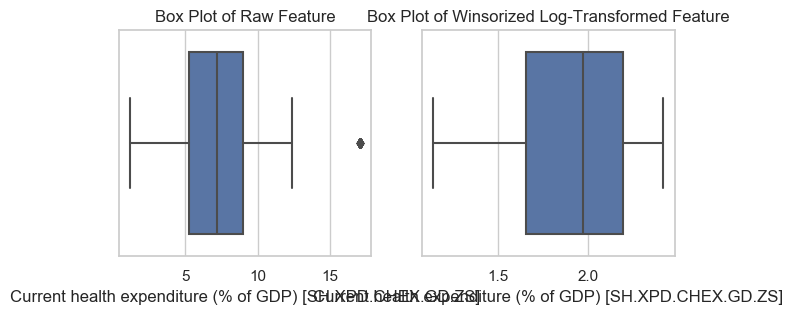

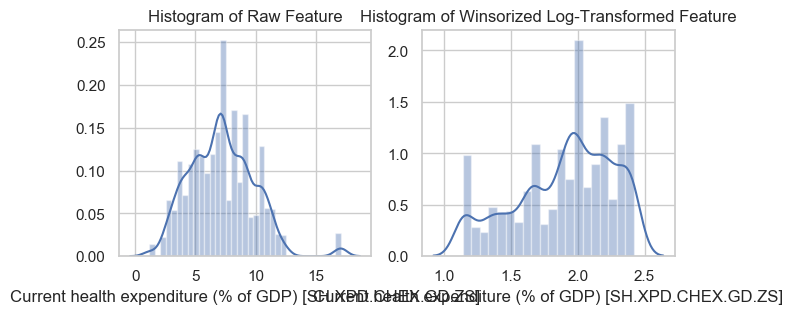

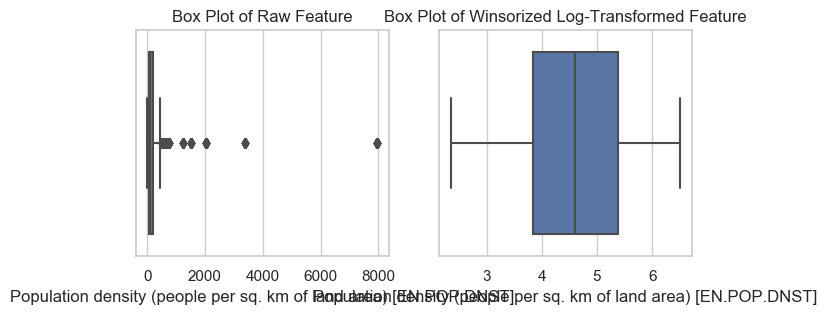

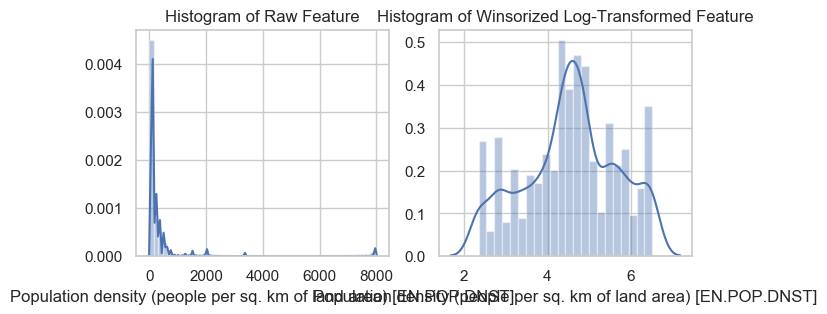

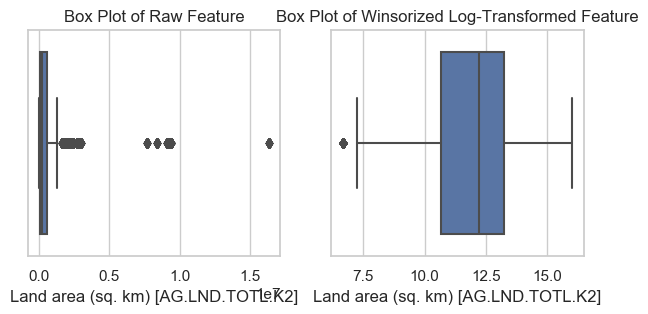

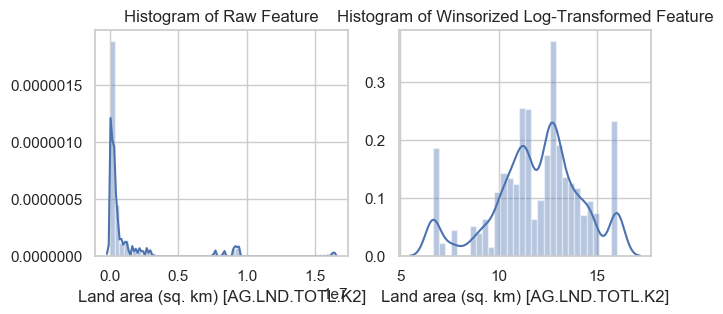

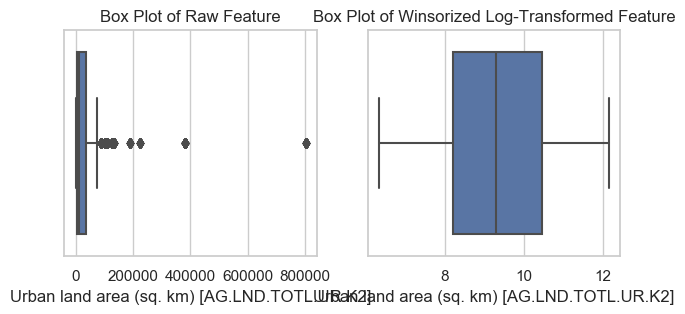

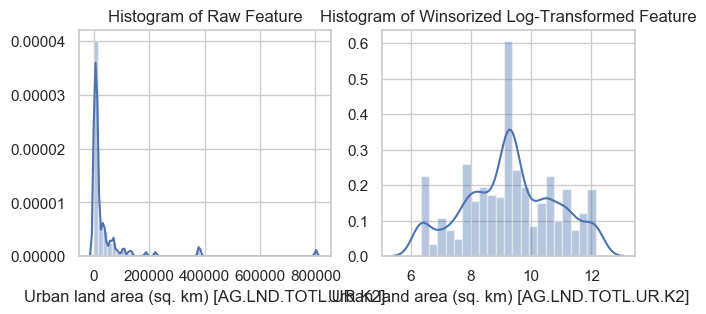

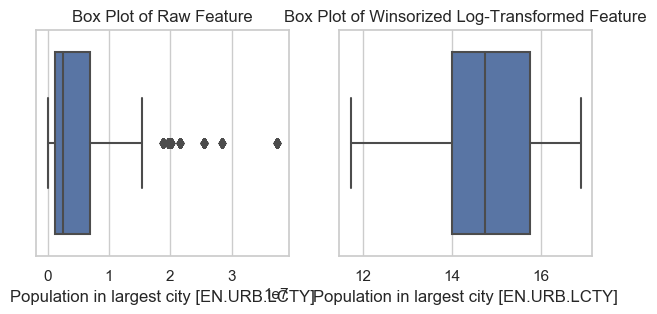

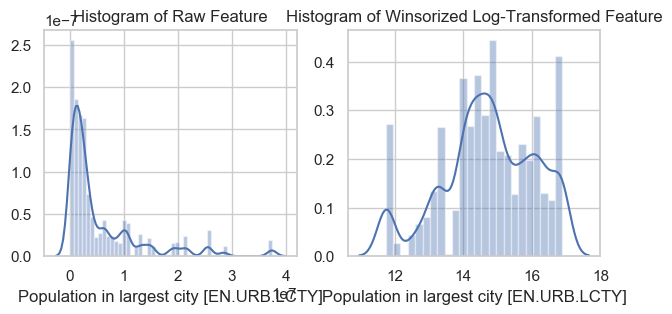

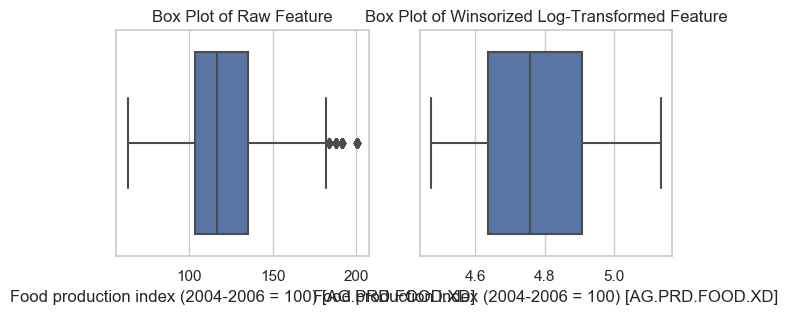

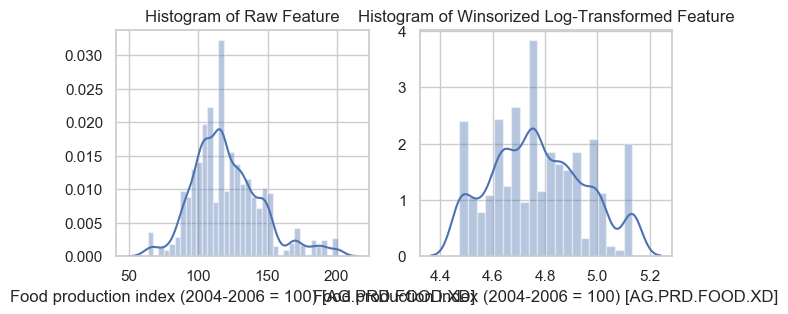

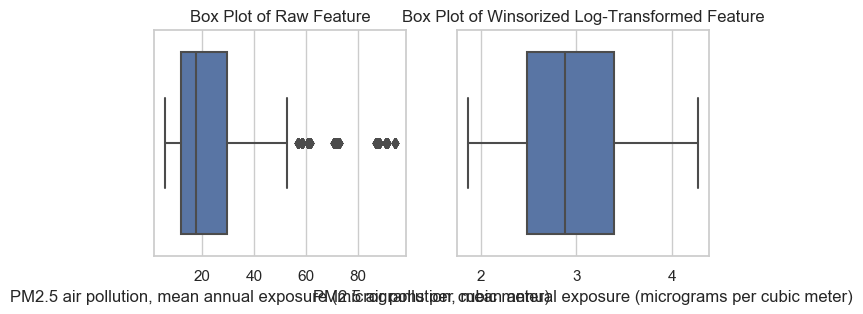

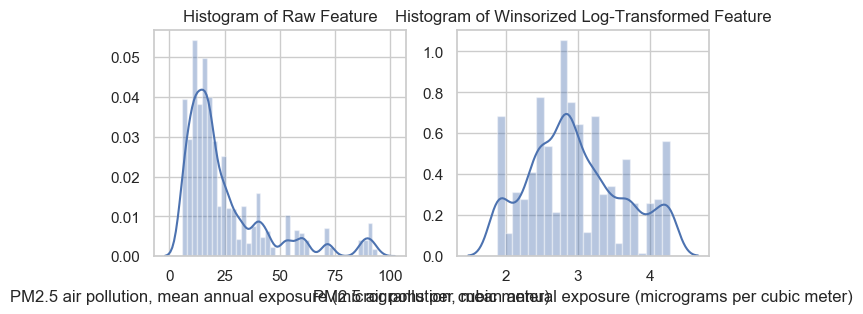

In [31]:
for feature in df_wins_log:
    plt.figure(figsize=(15,3))
    plt.subplot(1,4,1)
    sns.boxplot(df_merged[feature])
    plt.title("Box Plot of Raw Feature")
    plt.subplot(1,4,2)
    sns.boxplot(df_wins_log[feature])
    plt.title("Box Plot of Winsorized Log-Transformed Feature")
    plt.show()
        
    plt.figure(figsize=(15,3))
    plt.subplot(1,4,3)
    sns.distplot(df_merged[feature])
    plt.title("Histogram of Raw Feature")
    plt.subplot(1,4,4)
    sns.distplot(df_wins_log[feature])
    plt.title("Histogram of Winsorized Log-Transformed Feature")
    plt.show()

## Merging Transformed Features in one last dataset

In [32]:
df_th = pd.DataFrame()

for feature in df_wins_log:
    if feature == "Net migration [SM.POP.NETM]":
        break
    else:
        df_th[feature] = df_wins_log[feature]
        
df_th["Net migration [SM.POP.NETM]"] = df_wins["Net migration [SM.POP.NETM]"]
df_th

total_cases  \
109          4.663   
110          4.736   
111          4.949   
112          5.112   
113          5.257   
...            ...   
11827        7.865   
11828        7.931   
11829        8.018   
11830        8.058   
11831        8.102   

       Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
109                                                4.238                       
110                                                4.238                       
111                                                4.238                       
112                                                4.238                       
113                                                4.238                       
...                                                  ...                       
11827                                              4.572                       
11828                                              4.572                       
11829                                              4.572                       
11830                                              4.572                       
11831                                              4.572                       

       Life expectancy at birth, total (years) [SP.DYN.LE00.IN]  \
109                                                4.161          
110                                                4.161          
111                                                4.161          
112                                                4.161          
113                                                4.161          
...                                                  ...          
11827                                              4.152          
11828                                              4.152          
11829                                              4.152          
11830                                              4.152          
11831                                              4.152          

       Labor force, total [SL.TLF.TOTL.IN]  \
109                                 16.451   
110                                 16.451   
111                                 16.451   
112                                 16.451   
113                                 16.451   
...                                    ...   
11827                               16.940   
11828                               16.940   
11829                               16.940   
11830                               16.940   
11831                               16.940   

       Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]  \
109                                                4.080                             
110                                                4.080                             
111                                                4.080                             
112                                                4.080                             
113                                                4.080                             
...                                                  ...                             
11827                                              4.466                             
11828                                              4.466                             
11829                                              4.466                             
11830                                              4.466                             
11831                                              4.466                             

       Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]  \
109                                                4.311                         
110                                                4.311                         
111                                                4.311                         
112                                                4.311      

## Last Checks

In [33]:
check= pd.DataFrame(columns = df_merged.columns)

for feature1 in df_merged:
    for feature2 in df_th:
        if feature1 == feature2:
            del check[feature1]
            
check.columns

Index(['iso_code', 'location', 'Country Name'], dtype='object')

I checked if I forget anything in my final dataset and as I worked only with non-categorical features in these document, I'm missing "location" or "Country Name". I'm going to add one of them and will get dummies for them.

In [34]:
df_th["location"] = df_merged["location"]

In [35]:
df_th.sort_values(by=["location","total_cases"])

countries= df_th["location"].unique()

df_th.head(30)

total_cases  \
109        4.663   
110        4.736   
111        4.949   
112        5.112   
113        5.257   
114        5.460   
115        5.460   
116        5.598   
117        5.700   
118        5.820   
119        5.905   
120        6.047   
121        6.182   
122        6.256   
123        6.319   
124        6.409   
125        6.500   
126        6.571   
127        6.664   
128        6.677   
129        6.739   
130        6.811   
131        6.904   
132        6.938   
180        4.812   
181        4.984   
182        5.159   
183        5.226   
184        5.283   
185        5.357   

     Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
109                                              4.238                       
110                                              4.238                       
111                                              4.238                       
112                                              4.238                       
113                                              4.238                       
114                                              4.238                       
115                                              4.238                       
116                                              4.238                       
117                                              4.238                       
118                                              4.238                       
119                                              4.238                       
120                                              4.238                       
121                                              4.238                       
122                                              4.238                       
123                                              4.238                       
124                                              4.238                       
125                                              4.238                       
126                                              4.238                       
127                                              4.238                       
128                                              4.238                       
129                                              4.238                       
130                                              4.238                       
131                                              4.238                       
132                                              4.238                       
180                                              4.603                       
181                                              4.603                       
182                                              4.603                       
183                                              4.603                       
184                                              4.603                       
185                                              4.603                       

     Life expectancy at birth, total (years) [SP.DYN.LE00.IN]  \
109                                              4.161          
110                                              4.161          
111                                              4.161          
112                                              4.161          
113                                              4.161          
114                                              4.161          
115                                              4.161          
116                                              4.161          
117                                              4.161          
118                                              4.161          
119                                              4.161          
120                                              4.161          
121                                              4.161          
122                                              4.161 

In [36]:
for country in countries:
    i= 1
    for index in df_th[df_th["location"] == country].index:
        df_th.loc[index,"Day"] = i
        i +=1

I sorted by both "total cases" for each country and added day numbers as a new feature column

In [37]:
df_th["Day"].head(30)

109    1.000
110    2.000
111    3.000
112    4.000
113    5.000
114    6.000
115    7.000
116    8.000
117    9.000
118   10.000
119   11.000
120   12.000
121   13.000
122   14.000
123   15.000
124   16.000
125   17.000
126   18.000
127   19.000
128   20.000
129   21.000
130   22.000
131   23.000
132   24.000
180    1.000
181    2.000
182    3.000
183    4.000
184    5.000
185    6.000
Name: Day, dtype: float64

In [38]:
df_th

total_cases  \
109          4.663   
110          4.736   
111          4.949   
112          5.112   
113          5.257   
...            ...   
11827        7.865   
11828        7.931   
11829        8.018   
11830        8.058   
11831        8.102   

       Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
109                                                4.238                       
110                                                4.238                       
111                                                4.238                       
112                                                4.238                       
113                                                4.238                       
...                                                  ...                       
11827                                              4.572                       
11828                                              4.572                       
11829                                              4.572                       
11830                                              4.572                       
11831                                              4.572                       

       Life expectancy at birth, total (years) [SP.DYN.LE00.IN]  \
109                                                4.161          
110                                                4.161          
111                                                4.161          
112                                                4.161          
113                                                4.161          
...                                                  ...          
11827                                              4.152          
11828                                              4.152          
11829                                              4.152          
11830                                              4.152          
11831                                              4.152          

       Labor force, total [SL.TLF.TOTL.IN]  \
109                                 16.451   
110                                 16.451   
111                                 16.451   
112                                 16.451   
113                                 16.451   
...                                    ...   
11827                               16.940   
11828                               16.940   
11829                               16.940   
11830                               16.940   
11831                               16.940   

       Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]  \
109                                                4.080                             
110                                                4.080                             
111                                                4.080                             
112                                                4.080                             
113                                                4.080                             
...                                                  ...                             
11827                                              4.466                             
11828                                              4.466                             
11829                                              4.466                             
11830                                              4.466                             
11831                                              4.466                             

       Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]  \
109                                                4.311                         
110                                                4.311                         
111                                                4.311                         
112                                                4.311      

In [39]:
feed_the_model = df_th.copy()

for country in countries:
    feed_the_model[country] = pd.get_dummies(feed_the_model["location"])[country]
del feed_the_model["location"]
feed_the_model

total_cases  \
109          4.663   
110          4.736   
111          4.949   
112          5.112   
113          5.257   
...            ...   
11827        7.865   
11828        7.931   
11829        8.018   
11830        8.058   
11831        8.102   

       Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
109                                                4.238                       
110                                                4.238                       
111                                                4.238                       
112                                                4.238                       
113                                                4.238                       
...                                                  ...                       
11827                                              4.572                       
11828                                              4.572                       
11829                                              4.572                       
11830                                              4.572                       
11831                                              4.572                       

       Life expectancy at birth, total (years) [SP.DYN.LE00.IN]  \
109                                                4.161          
110                                                4.161          
111                                                4.161          
112                                                4.161          
113                                                4.161          
...                                                  ...          
11827                                              4.152          
11828                                              4.152          
11829                                              4.152          
11830                                              4.152          
11831                                              4.152          

       Labor force, total [SL.TLF.TOTL.IN]  \
109                                 16.451   
110                                 16.451   
111                                 16.451   
112                                 16.451   
113                                 16.451   
...                                    ...   
11827                               16.940   
11828                               16.940   
11829                               16.940   
11830                               16.940   
11831                               16.940   

       Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]  \
109                                                4.080                             
110                                                4.080                             
111                                                4.080                             
112                                                4.080                             
113                                                4.080                             
...                                                  ...                             
11827                                              4.466                             
11828                                              4.466                             
11829                                              4.466                             
11830                                              4.466                             
11831                                              4.466                             

       Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]  \
109                                                4.311                         
110                                                4.311                         
111                                                4.311                         
112                                                4.311      

In [40]:
feed_the_model.to_excel("feed_the_model.xlsx",index=False)

Finished my job with creating ready-to-model dataset and saved it as "feed_the_model.xlsx". Now I can start to analyze my data.

# Analyzing the dataset

## Getting General Properties

In [41]:
df_th

total_cases  \
109          4.663   
110          4.736   
111          4.949   
112          5.112   
113          5.257   
...            ...   
11827        7.865   
11828        7.931   
11829        8.018   
11830        8.058   
11831        8.102   

       Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
109                                                4.238                       
110                                                4.238                       
111                                                4.238                       
112                                                4.238                       
113                                                4.238                       
...                                                  ...                       
11827                                              4.572                       
11828                                              4.572                       
11829                                              4.572                       
11830                                              4.572                       
11831                                              4.572                       

       Life expectancy at birth, total (years) [SP.DYN.LE00.IN]  \
109                                                4.161          
110                                                4.161          
111                                                4.161          
112                                                4.161          
113                                                4.161          
...                                                  ...          
11827                                              4.152          
11828                                              4.152          
11829                                              4.152          
11830                                              4.152          
11831                                              4.152          

       Labor force, total [SL.TLF.TOTL.IN]  \
109                                 16.451   
110                                 16.451   
111                                 16.451   
112                                 16.451   
113                                 16.451   
...                                    ...   
11827                               16.940   
11828                               16.940   
11829                               16.940   
11830                               16.940   
11831                               16.940   

       Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]  \
109                                                4.080                             
110                                                4.080                             
111                                                4.080                             
112                                                4.080                             
113                                                4.080                             
...                                                  ...                             
11827                                              4.466                             
11828                                              4.466                             
11829                                              4.466                             
11830                                              4.466                             
11831                                              4.466                             

       Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]  \
109                                                4.311                         
110                                                4.311                         
111                                                4.311                         
112                                                4.311      

In [42]:
df_th.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4127 entries, 109 to 11831
Data columns (total 19 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   total_cases                                                                  4127 non-null   float64
 1   Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]        4127 non-null   float64
 2   Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                     4127 non-null   float64
 3   Labor force, total [SL.TLF.TOTL.IN]                                          4127 non-null   float64
 4   Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]  4127 non-null   float64
 5   Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]      4127 non-null   float64
 6   School enrollment, primary (% gross) 

We have 18 features and one target variable. One of the our features is object. We will need to get_dummies for it.

In [43]:
df_th.describe()

total_cases  \
count     4127.000   
mean         7.109   
std          1.851   
min          4.615   
25%          5.617   
50%          6.741   
75%          8.232   
max         13.577   

       Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]  \
count                                           4127.000                       
mean                                               4.550                       
std                                                0.105                       
min                                                4.238                       
25%                                                4.572                       
50%                                                4.596                       
75%                                                4.603                       
max                                                4.605                       

       Life expectancy at birth, total (years) [SP.DYN.LE00.IN]  \
count                                           4127.000          
mean                                               4.336          
std                                                0.072          
min                                                4.152          
25%                                                4.308          
50%                                                4.340          
75%                                                4.399          
max                                                4.422          

       Labor force, total [SL.TLF.TOTL.IN]  \
count                             4127.000   
mean                                15.847   
std                                  1.454   
min                                 13.313   
25%                                 14.812   
50%                                 15.737   
75%                                 16.945   
max                                 18.698   

       Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]  \
count                                           4127.000                             
mean                                               4.520                             
std                                                0.129                             
min                                                4.080                             
25%                                                4.541                             
50%                                                4.566                             
75%                                                4.581                             
max                                                4.603                             

       Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]  \
count                                           4127.000                         
mean                                               4.572                         
std                                                0.072                         
min                                                4.311                         
25%                                                4.591                         
50%                                                4.596                         
75%                                                4.601                         
max                                                4.604                         

       School enrollment, primary (% gross) [SE.PRM.ENRR]  \
count                                           4127.000    
mean                                               4.624    
std                                                0.056    
min                                                4.507    
25%                                                4.602    
50%                                                4.619    
75%                                                4.653    
max                                                4.741    

    

## Distribution

In [45]:
features_non_object = list(df_th.columns)
features_non_object.remove("location")


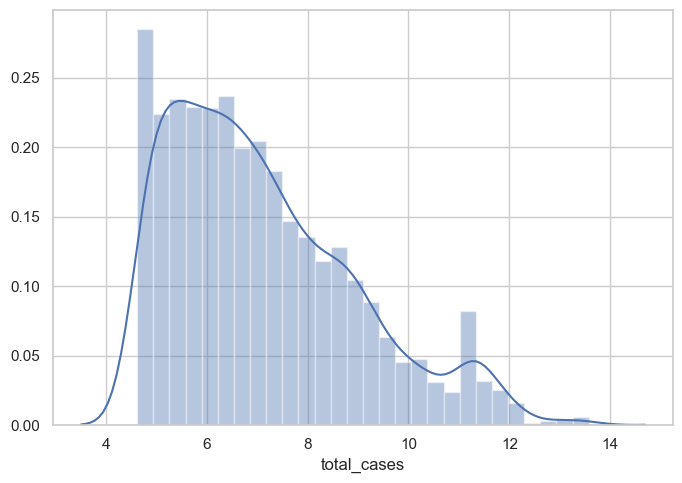

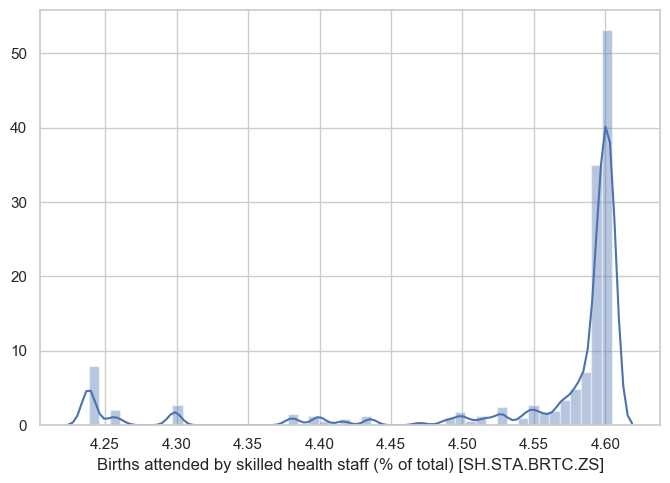

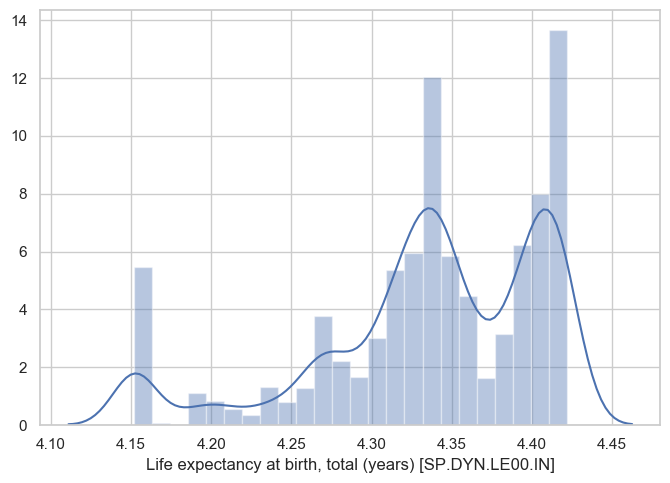

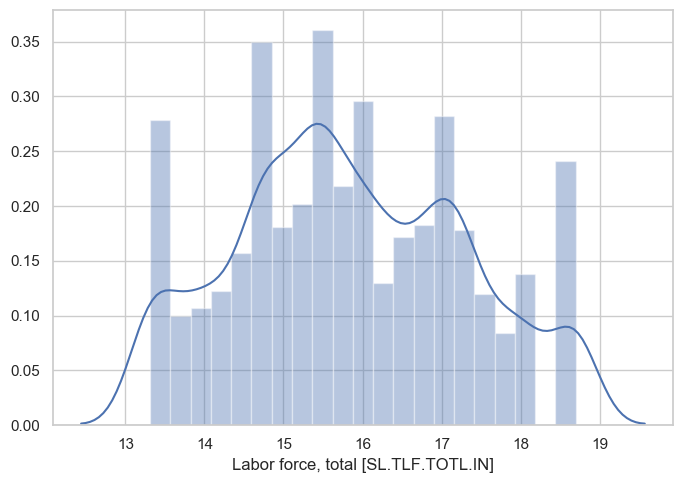

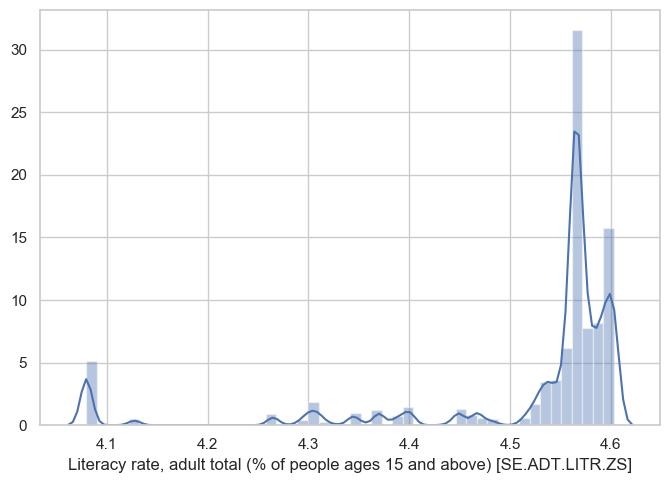

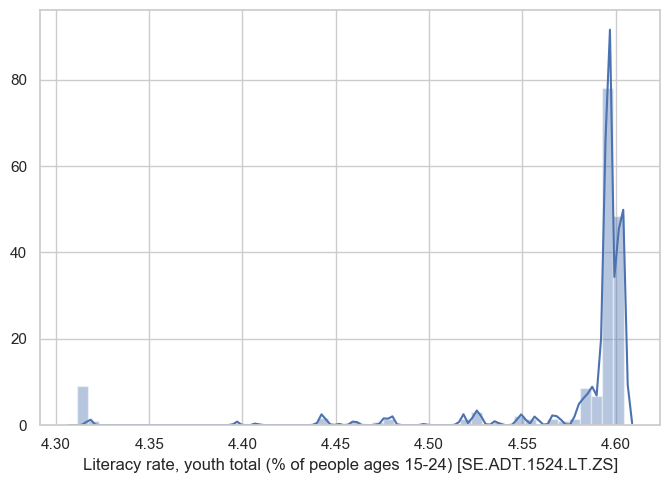

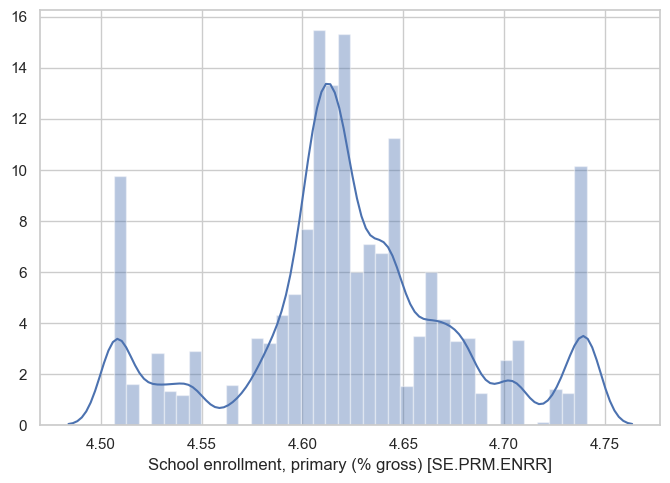

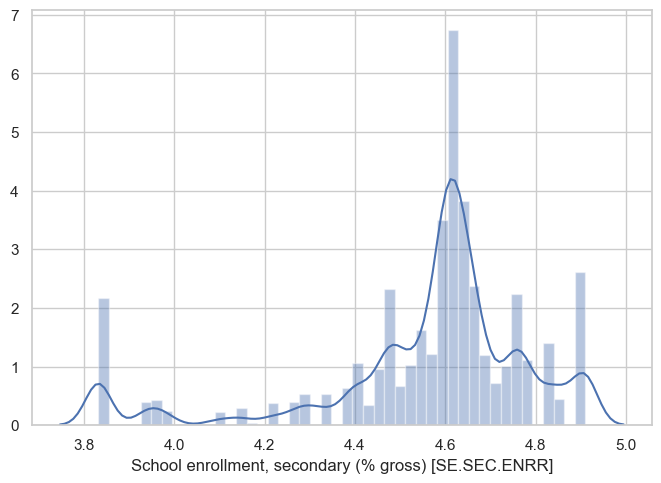

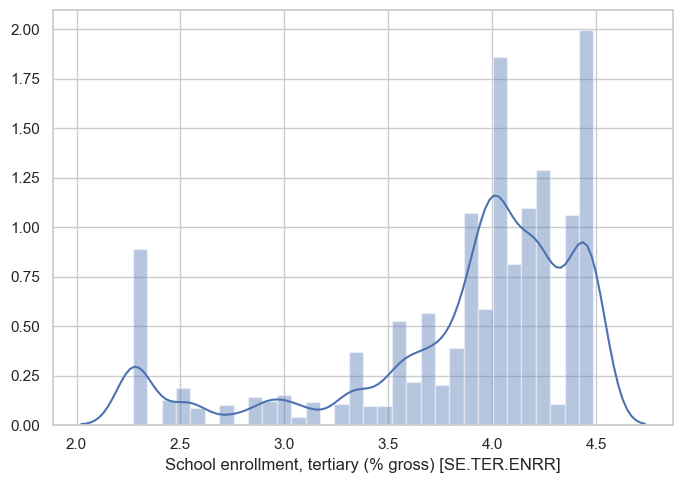

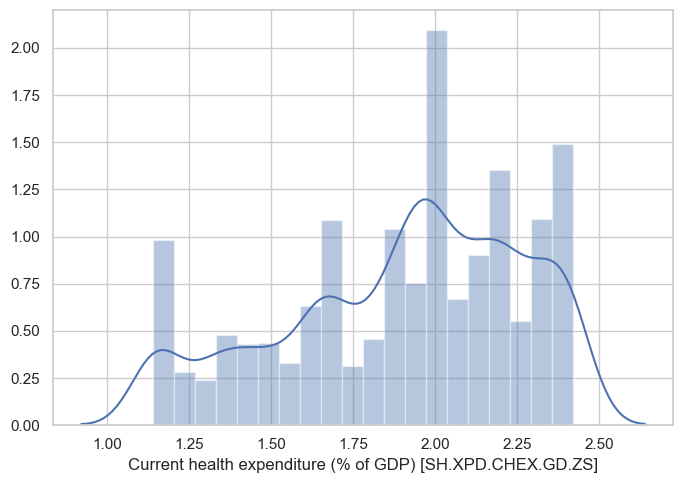

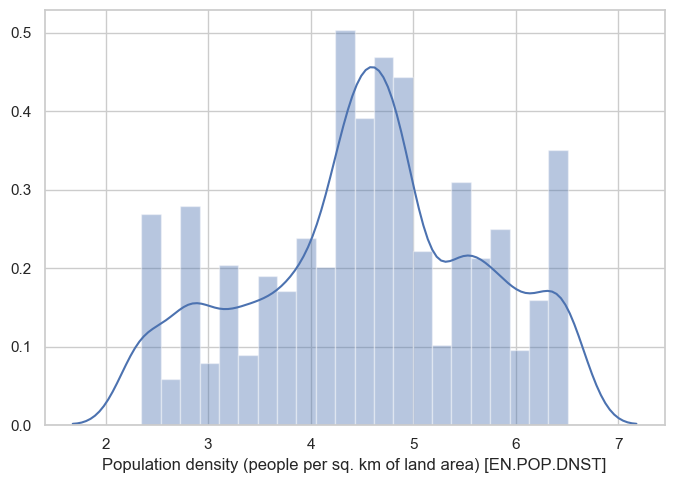

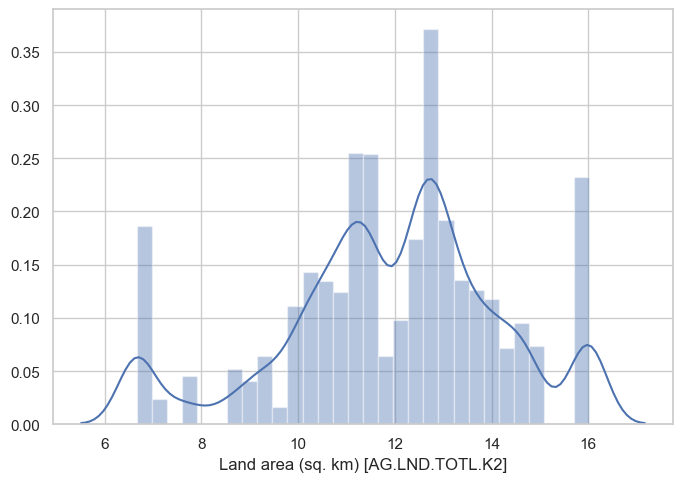

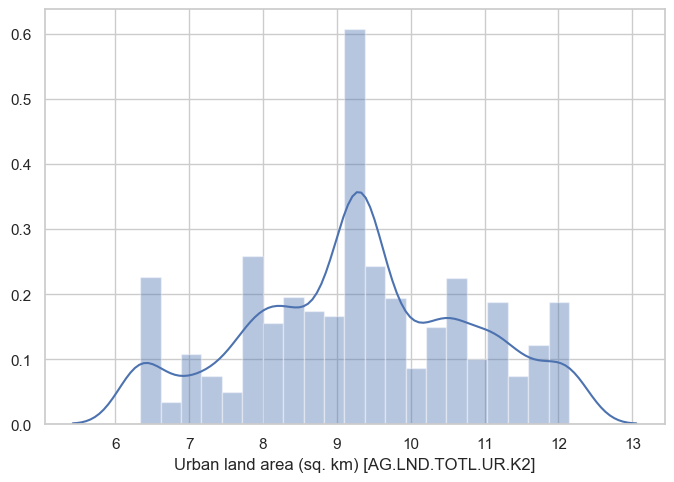

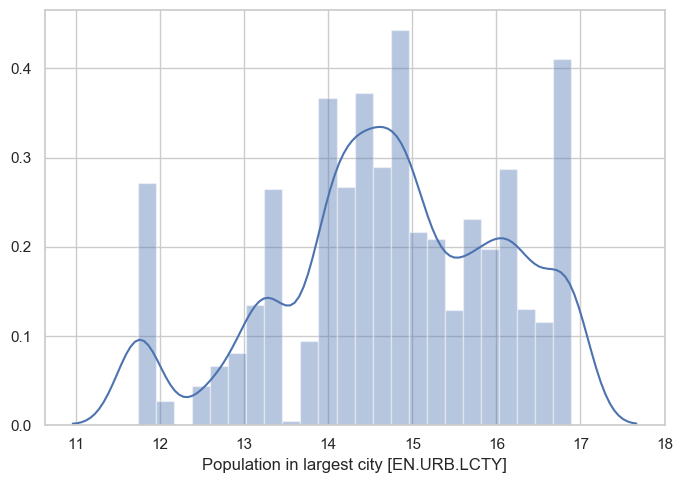

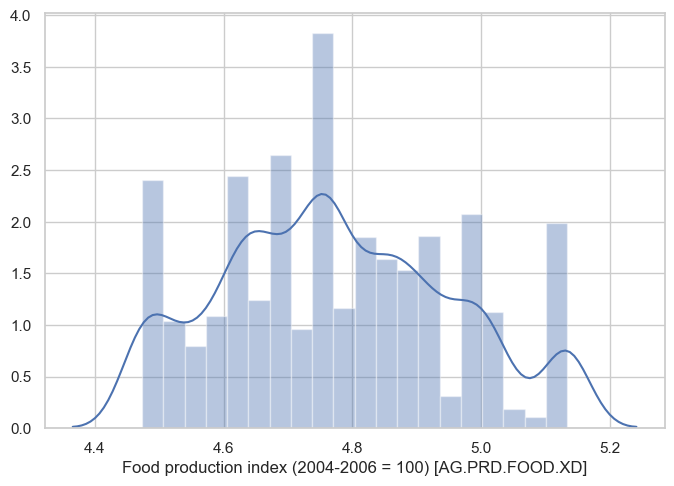

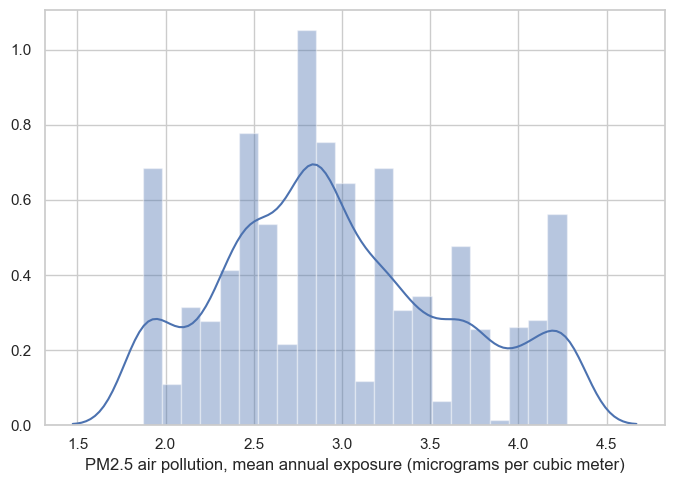

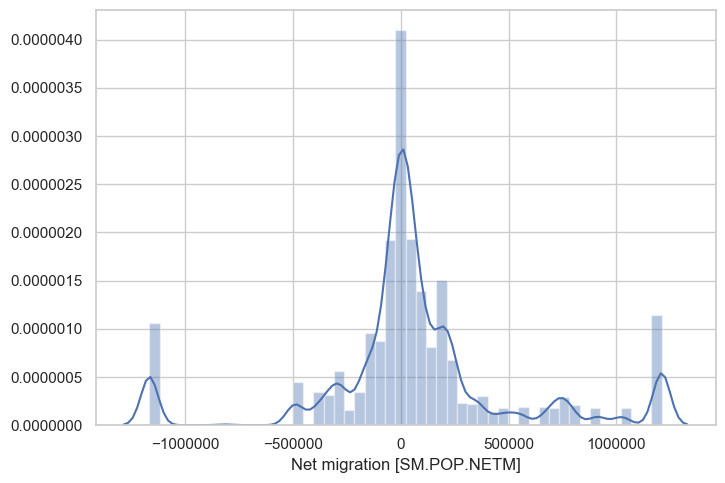

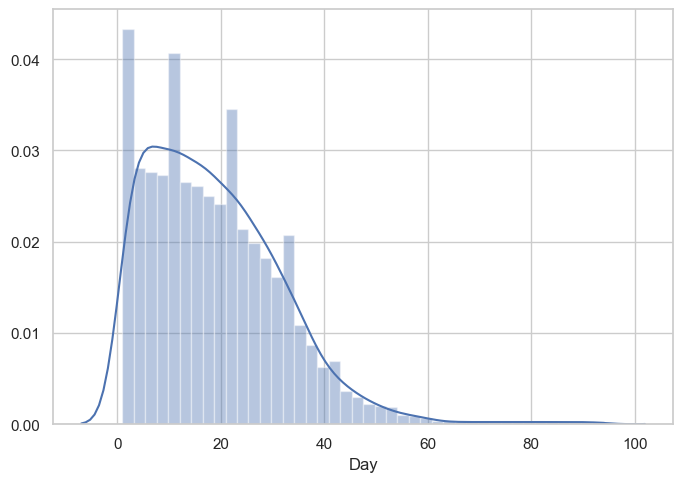

In [46]:
for feature in features_non_object:
    sns.distplot(df_th[feature])
    plt.show()

## Corelation

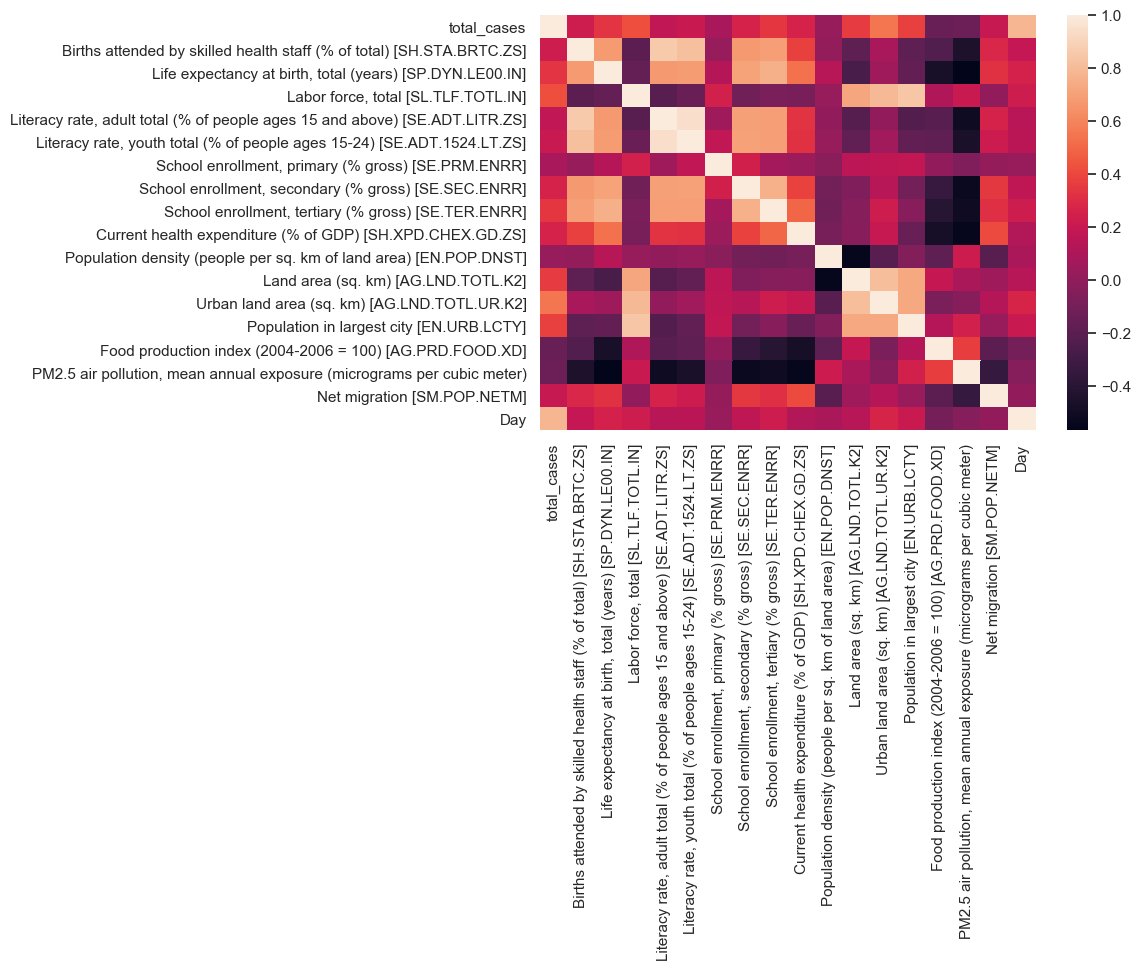

In [44]:
sns.heatmap(df_th.corr())
plt.show()

## Some comments on feature to feature